In [1]:
#Carico le librerie
import json
import pandas as pd
import numpy as np
import configparser
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Global Parameters
stop_words = set(stopwords.words('english'))
import io
import bson                       # this is installed with the pymongo package
import matplotlib.pyplot as plt
from skimage.data import imread   # or, whatever image library you prefer
import multiprocessing as mp 

In [2]:
#Carico librerie
import simplejson
from twython import Twython
import collections
import bson
from bson.codec_options import CodecOptions
import datetime as dt
import json
from collections import Counter
import itertools

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [5]:
#Carico i file csv e li assegno ad un oggetto [TEO]:
data_ingestion_Trump = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/Trump.csv")
data_ingestion_Trump_1 = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/Trump_1.csv")
data_ingestion_Biden = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/Biden.csv")
data_ingestion_Biden_1 = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/Biden_1.csv")
data_ingestion_Vote = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/Vote.csv")
data_ingestion_MAGA = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/MAGA.csv")
data_ingestion_election2020 = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/election2020.csv")
data_ingestion_ElectionDay = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/ElectionDay.csv")
data_ingestion_election2020_1 = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/election2020_1.csv")
data_ingestion_ElectionDay_1 = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/ElectionDay_1.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#carico datasets [GABRI]:
data_ingestion_gabri_uno = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/unoundici.csv")
data_ingestion_gabri_due = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/dueundici.csv")
data_ingestion_gabri_tre = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/treundici.csv")
data_ingestion_gabri_quattro = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/quattroundici.csv")
data_ingestion_gabri_cinque = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/cinqueundici.csv")
data_ingestion_gabri_sei = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/seiundici.csv")
data_ingestion_gabri_sette = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/setteundici.csv")
data_ingestion_gabri_otto = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/ottoundici.csv")
data_ingestion_gabri_nove = pd.read_csv("/Users/matteo/Desktop/DATA SCIENCE/Social Media Analysis/Progetto/noveundici.csv")

In [7]:
#Funzione per rimuovere le colonne da un determinato dataset:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [8]:
#Assegno i dataset originali a dataset sui quali andremo a lavorarci 
df_Trump = data_ingestion_Trump
df_Trump_1 = data_ingestion_Trump_1
df_Biden = data_ingestion_Biden
df_Biden_1 = data_ingestion_Biden_1
df_Vote = data_ingestion_Vote
df_MAGA = data_ingestion_MAGA
df_election2020 = data_ingestion_election2020
df_ElectionDay = data_ingestion_ElectionDay
df_election2020_1 = data_ingestion_election2020_1
df_ElectionDay_1 = data_ingestion_ElectionDay_1

In [9]:
#[GABRI]
df_gabri_uno = data_ingestion_gabri_uno
df_gabri_due = data_ingestion_gabri_due
df_gabri_tre = data_ingestion_gabri_tre
df_gabri_quattro = data_ingestion_gabri_quattro
df_gabri_cinque = data_ingestion_gabri_cinque
df_gabri_sei = data_ingestion_gabri_sei
df_gabri_sette = data_ingestion_gabri_sette
df_gabri_otto = data_ingestion_gabri_otto
df_gabri_nove = data_ingestion_gabri_nove

In [10]:
#Togliamo le colonne che non servono:
df_Trump = remove_unwanted_cols(df_Trump, ['Number_Retweet', 'Name'])
df_Trump_1 = remove_unwanted_cols(df_Trump_1, ['Number_Retweet', 'Name'])
df_Biden = remove_unwanted_cols(df_Biden, [ 'Number_Retweet', 'Name'])
df_Biden_1 = remove_unwanted_cols(df_Biden_1, ['Number_Retweet', 'Name'])
df_Vote = remove_unwanted_cols(df_Vote, ['Number_Retweet', 'Name'])
df_MAGA = remove_unwanted_cols(df_MAGA, ['Number_Retweet', 'Name'])
df_election2020 = remove_unwanted_cols(df_election2020, ['Number_Retweet', 'Name'])
df_ElectionDay = remove_unwanted_cols(df_ElectionDay, [ 'Number_Retweet', 'Name'])
df_election2020_1 = remove_unwanted_cols(df_election2020_1, [ 'Number_Retweet', 'Name'])
df_ElectionDay_1= remove_unwanted_cols(df_ElectionDay_1, ['Number_Retweet', 'Name'])

In [11]:
#[GABRI]
df_gabri_uno = remove_unwanted_cols(df_gabri_uno, [ 'Number_Retweet', 'Name'])
df_gabri_due = remove_unwanted_cols(df_gabri_due, [ 'Number_Retweet', 'Name'])
df_gabri_tre = remove_unwanted_cols(df_gabri_tre, [ 'Number_Retweet', 'Name'])
df_gabri_quattro = remove_unwanted_cols(df_gabri_quattro, [ 'Number_Retweet', 'Name'])
df_gabri_cinque = remove_unwanted_cols(df_gabri_cinque, ['Number_Retweet', 'Name'])
df_gabri_sei = remove_unwanted_cols(df_gabri_sei, [ 'Number_Retweet', 'Name'])
df_gabri_sette = remove_unwanted_cols(df_gabri_sette, [ 'Number_Retweet', 'Name'])
df_gabri_otto = remove_unwanted_cols(df_gabri_otto, ['Number_Retweet', 'Name'])
df_gabri_nove = remove_unwanted_cols(df_gabri_nove, ['Number_Retweet', 'Name'])

In [12]:
#costruisco la colonna con gli hashtag presenti nel testo 
df_Trump["hashtags"] = df_Trump["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Trump_1["hashtags"] = df_Trump_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_election2020["hashtags"] = df_election2020["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_election2020_1["hashtags"] = df_election2020_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Biden["hashtags"] = df_Biden["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Biden_1["hashtags"] = df_Biden_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Vote["hashtags"] = df_Vote["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_MAGA["hashtags"] = df_MAGA["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_ElectionDay["hashtags"] = df_ElectionDay["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_ElectionDay_1["hashtags"] = df_ElectionDay_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))

#[GABRI]:
df_gabri_uno["hashtags"] = df_gabri_uno["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_due["hashtags"] = df_gabri_due["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_tre["hashtags"] = df_gabri_tre["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_quattro["hashtags"] = df_gabri_quattro["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_cinque["hashtags"] = df_gabri_cinque["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_sei["hashtags"] = df_gabri_sei["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_sette["hashtags"] = df_gabri_sette["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_otto["hashtags"] = df_gabri_otto["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_nove["hashtags"] = df_gabri_nove["Text"].apply(lambda x: re.findall(r"#(\w+)", x))

In [13]:
#DATASET UNICO:
datasets_singoli = [df_election2020, df_election2020_1, df_Trump, df_Trump_1, df_Biden, df_Biden_1, df_Vote, df_MAGA, df_ElectionDay, df_ElectionDay_1, df_gabri_uno, df_gabri_due, df_gabri_tre, df_gabri_quattro, df_gabri_cinque, df_gabri_sei, df_gabri_sette, df_gabri_otto, df_gabri_nove]
dataset_unico_1 = pd.concat(datasets_singoli)
print("Il numero di tweets contenuti nel dataset unico:")
len(dataset_unico_1.index)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Il numero di tweets contenuti nel dataset unico:


4109447

In [14]:
#COSTRUZIONE 3 NOVEMBRE TEST, PRIMA DEL PRE-PROCESSING 
dataset_unico_test = dataset_unico_1
dataset_unico_test['Date_time'] = pd.to_datetime(dataset_unico_test['Date_time'])
dataset_unico_test['Novembre'] = dataset_unico_test.Date_time.dt.day
dataset_test_3_nov = dataset_unico_test.loc[dataset_unico_test['Novembre'] == 3]
len(dataset_test_3_nov)

655137

In [15]:
#COSTRUZIONE 7 NOVEMBRE, PRIMA DEL PRE-PROCESSING
dataset_test_7_nov = dataset_unico_test.loc[dataset_unico_test['Novembre'] == 7]
len(dataset_test_7_nov)

1252050

In [16]:
#Funzione di preprocessing:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [17]:
#Eseguo la funzione di preprocessing del testo e creo Text_clean_1 come nuovo testo pulito:
dataset_test_3_nov["Text_clean_1"] = dataset_test_3_nov['Text'].apply(preprocess_tweet_text)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#Eseguo la funzione di preprocessing del testo e creo Text_clean_1 come nuovo testo pulito:
dataset_test_7_nov["Text_clean_1"] = dataset_test_7_nov['Text'].apply(preprocess_tweet_text)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
#rimuovo le emoji presenti nel testo:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"# flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [19]:
#Vado ad effettuare la pulizia delle emoji presenti nel testo:
dataset_test_3_nov["Text_clean_1"] = dataset_test_3_nov['Text_clean_1'].apply(deEmojify)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
dataset_test_7_nov["Text_clean_1"] = dataset_test_7_nov['Text_clean_1'].apply(deEmojify)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
#Utilizzo una funzione per identificare una serie di elementi da eleminare nel testo
import re

emoticons_str = r"""
    (?:
    [:=;] # Eyes
    [oO\-]? # Nose (optional)
    [D\)\]\(\]/\\OpP] # Mouth
    )"""
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

#Definisco le funzioni per tokenizare:
def tokenize(s):
        return tokens_re.findall(s)
    
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [21]:
#Vado ad effettuare il preprocessing per la tokenizzazione:
dataset_test_3_nov["Text_clean_1"] = dataset_test_3_nov["Text_clean_1"].apply(preprocess)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
dataset_test_7_nov["Text_clean_1"] = dataset_test_7_nov["Text_clean_1"].apply(preprocess)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#definisco una funzione in grado di eliminare le stopwords (articoli, preposizioni)
from nltk.corpus import stopwords
stop =stopwords.words('english')

In [23]:
def preprocess(tokenized_sentence):
  return [item for item in tokenized_sentence if item not in stop]
tweets_tokenized_prep_3_nov = dataset_test_3_nov["Text_clean_1"].apply(preprocess)
tweets_tokenized_prep_3_nov

14814     [Well, ready, Weve, known, going, try, Patriot...
14815     [Exclusive, Deutsche, Bank, looking, ways, end...
14816     [RT, Shocking, Imran, Khan, Fails, People, sup...
14817     [Polls, Elections, The, silent, majority, spea...
14818     [RT, Let, ’, bark, Biden, return, dogs, —, dec...
                                ...                        
108366    [RT, Map, American, election, projection, 2020...
108367    [RT, How, Election, 2020, impacting, employee,...
108368                            [FOUR, MORE, YEARSnnMAGA]
108369    [Ben, great, communicator, Bradley, passing, w...
108370              [RT, Last, hopes, 2020, Election, 2020]
Name: Text_clean_1, Length: 655137, dtype: object

In [30]:
def preprocess(tokenized_sentence):
  return [item for item in tokenized_sentence if item not in stop]
tweets_tokenized_prep_7_nov = dataset_test_7_nov["Text_clean_1"].apply(preprocess)
tweets_tokenized_prep_7_nov

31722     [RT, BREAKING, Sen, Kamala, Harris, calls, Joe...
31723     [RT, Jubilation, continues, New, York, City, l...
31724     [RT, Wesker, weighs, nnTrump, done, Trumpisim,...
31725     [RT, This, actually, AMAZING, tweet, Mayor, Pa...
31726     [RT, The, reaction, Van, Jones, Joe, Biden, ne...
                                ...                        
387180    [RT, Election, 2020, cone, silence, It, ’, bac...
387181    [RT, How, important, Biden, ’, victory, Trump,...
387182    [RT, Perfect, sign, Biden, USElection, 2020, U...
387183    [RT, The, headline, I, ’, waiting, Election, 2...
387184    [Four, years, science, fits, narrativennElecti...
Name: Text_clean_1, Length: 1252050, dtype: object

In [24]:
#RIMOZIONE DELLA PUNTEGGIATURA 
import string

In [25]:
#Sistemo la punteggiatura presente nel testo rimuovendola e sistemandola:
punctuation = string.punctuation
def preprocess(tokenized_sentence):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in stop] #remove stopwords and lowercase
  return [item for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 

In [26]:
tweets_tokenized_prep_3_nov = dataset_test_3_nov["Text_clean_1"].apply(preprocess)
dataset_test_3_nov.head(10)

Date_time  Followers Hashtags                  Position  \
14814 2020-11-03 08:21:59        162      NaN   refugee from crazyville   
14815 2020-11-03 08:21:59         32      NaN                       NaN   
14816 2020-11-03 08:22:00        211      NaN                       NaN   
14817 2020-11-03 08:22:00       1018      NaN                       🌍📍🤔   
14818 2020-11-03 08:22:00        134      NaN             Manhattan, NY   
14819 2020-11-03 08:22:00        157      NaN  British Columbia, Canada   
14820 2020-11-03 08:22:01      16983      NaN                  Michigan   
14821 2020-11-03 08:22:01        109      NaN                       NaN   
14822 2020-11-03 08:22:01        273      NaN       Manchester, England   
14823 2020-11-03 08:22:01        360      NaN      Dublin City, Ireland   

           Screen_name                                               Text  \
14814      MGHVentures  We'll be ready. We've known they were going to...   
14815      Bob82993203  @JoeBiden Exclusive: Deutsche Bank is looking ...   
14816   DeliverTruth__  RT @FTJ22211: @TDKBOND @niyazee26 @MuhammadQas...   
14817          SmokeOs  Polls are not Elections, The silent majority w...   
14818  Austinm42974859  RT @TheDailyEdge: Let’s bark for Biden and ret...   
14819        sidocean_  RT @MeanwhileinCana: Dear America,\nWhat's ora...   
14820  struppa_anthony  RT @PastorDScott: We need to set all time reco...   
14821       JimMeekII1  RT @PastorDScott: We need to set all time reco...   
14822            ads82  America, please do not mess this up! #TrumpOut...   
14823  emeraldeyes8915  You’ve got this, America.\n\nI pray the right ...   

                                        _id  \
14814  ObjectId("5fa1132ccf98d919ebcf4ed6")   
14815  ObjectId("5fa1132ccf98d919ebcf4ed7")   
14816  ObjectId("5fa1132dcf98d919ebcf4ed8")   
14817  ObjectId("5fa1132dcf98d919ebcf4ed9")   
14818  ObjectId("5fa1132dcf98d919ebcf4eda")   
14819  ObjectId("5fa1132dcf98d919ebcf4edb")   
14820  ObjectId("5fa1132ecf98d919ebcf4edc")   
14821  ObjectId("5fa1132ecf98d919ebcf4edd")   
14822  ObjectId("5fa1132ecf98d919ebcf4ede")   
14823  ObjectId("5fa1132ecf98d919ebcf4edf")   

                                          hashtags  Novembre  \
14814                                           []         3   
14815                                           []         3   
14816                                           []         3   
14817                               [Election2020]         3   
14818  [ElectionDay, Election2020, VoteBidenHarri]         3   
14819                     [Election2020, GlobalEm]         3   
14820                                           []         3   
14821                                           []         3   
14822                     [TrumpOut, Election2020]         3   
14823                                           []         3   

                                            Text_clean_1  
14814  [Well, ready, Weve, known, going, try, Patriot...  
14815  [Exclusive, Deutsche, Bank, looking, ways, end...  
14816  [RT, Shocking, Imran, Khan, Fails, People, sup...  
14817  [Polls, Elections, The, silent, majority, spea...  
14818  [RT, Let, ’, bark, Biden, return, dogs, —, and...  
14819  [RT, Dear, AmericanWhats, orange, hollow, thro...  
14820  [RT, We, need, set, time, records, voter, turn...  
14821  [RT, We, need, set, time, records, voter, turn...  
14822  [America, please, mess, TrumpOut, Election, 2020]  
14823  [You, ’, got, AmericannI, pray, right, result,...

In [33]:
tweets_tokenized_prep_7_nov = dataset_test_7_nov["Text_clean_1"].apply(preprocess)
dataset_test_7_nov.head(10)

Date_time  Followers Hashtags                    Position  \
31722 2020-11-07 17:59:43        494      NaN                         NaN   
31723 2020-11-07 17:59:43        336      NaN           Brussels, Belgium   
31724 2020-11-07 17:59:43         37      NaN                         NaN   
31725 2020-11-07 17:59:43          3      NaN           anywhere but here   
31726 2020-11-07 17:59:43        249      NaN                         粒八区   
31727 2020-11-07 17:59:43          4      NaN       St John's Wood London   
31728 2020-11-07 17:59:43        659      NaN                         NaN   
31729 2020-11-07 17:59:43         11      NaN  Baden-Württemberg, Germany   
31730 2020-11-07 17:59:43         11      NaN                       Nepal   
31731 2020-11-07 17:59:43          8      NaN                         NaN   

           Screen_name                                               Text  \
31722       foolinred_  RT @thehill: #BREAKING: Sen. Kamala Harris cal...   
31723       NikKirkham  RT @AkpraiseMedia: Jubilation continues in New...   
31724      CyanPantera  RT @MrDCDouglas: Wesker weighs in. \n\nTrump i...   
31725          MailzDe  RT @ElieNYC: This is actually just an AMAZING ...   
31726   sawara_nishin_  RT @TomHourigan: The reaction of Van Jones to ...   
31727     SheilaWyatt2  RT @TomHourigan: The reaction of Van Jones to ...   
31728     _MyBROWNSkin  RT @Complex: THE VICE PRESIDENT WENT TO A HBCU...   
31729     peterduester  FBI wartet schon. Showdown am 21.01.2021, Inau...   
31730   Kishorpyakurel  #Election2020 hopefully some sanity returning ...   
31731  JoanCon67814599  The truth shall prevail !  More sheep, bought ...   

                                        _id        hashtags  Novembre  \
31722  ObjectId("5fa6e09483b78ae8b06e2f8f")      [BREAKING]         7   
31723  ObjectId("5fa6e09483b78ae8b06e2f90")              []         7   
31724  ObjectId("5fa6e09483b78ae8b06e2f91")              []         7   
31725  ObjectId("5fa6e09483b78ae8b06e2f92")              []         7   
31726  ObjectId("5fa6e09483b78ae8b06e2f93")  [Election2020]         7   
31727  ObjectId("5fa6e09483b78ae8b06e2f94")  [Election2020]         7   
31728  ObjectId("5fa6e09583b78ae8b06e2f95")  [Election2020]         7   
31729  ObjectId("5fa6e09583b78ae8b06e2f96")              []         7   
31730  ObjectId("5fa6e09583b78ae8b06e2f97")  [Election2020]         7   
31731  ObjectId("5fa6e09583b78ae8b06e2f98")              []         7   

                                            Text_clean_1  
31722  [RT, BREAKING, Sen, Kamala, Harris, calls, Joe...  
31723  [RT, Jubilation, continues, New, York, City, l...  
31724  [RT, Wesker, weighs, nnTrump, done, Trumpisim,...  
31725  [RT, This, actually, AMAZING, tweet, Mayor, Pa...  
31726  [RT, The, reaction, Van, Jones, Joe, Biden, ne...  
31727  [RT, The, reaction, Van, Jones, Joe, Biden, ne...  
31728  [RT, THE, VICE, PRESIDENT, WENT, TO, A, HBCUnn...  
31729  [FBI, wartet, schon, Showdown, 21012021, Inaug...  
31730  [Election, 2020, hopefully, sanity, returning,...  
31731  [The, truth, shall, prevail, More, sheep, boug...

In [27]:
#AGGIUNGIAMO MANUALMENTE ALCUNE PUNTEGGIATURE DA RIMUOVERE (MOLTO IMPORTANTE PERCHE' I CODICI NON SEMPRE TOLGONO TUTTO 
#ED AGGIUNGERE)
#N.B. CONVIENE FARE DEI COPIA INCOLLA DIRETTAMENTE DAI TOKEN PERCHE' SPESSO I CARATTERI VENGNO RILEVATI IN MODO DIVERSO
stop = set(stop)
stop.add("rt")
stop.add("…")
stop.add("n")
stop.add("’".lower())
stop.add("🇺")
stop.add("s")
stop.add("S".lower())
stop.add("nstay".lower())
stop.add(":/")
stop.add("nhttps".lower())
stop.add("https".lower())
stop.add("I")
stop.add("The")
stop.add("“")
stop.add("”")
stop.add("🇸")

stop = list(stop)
print(stop)

['during', 'd', 'yourselves', 'doesn', '🇺', "haven't", "wasn't", 'each', 'o', 'into', 'off', 'your', 'that', 'were', 'now', 'this', 'me', 'above', 'his', 'most', 'wasn', "don't", 'ain', 'between', ':/', 'theirs', 'themselves', 'doing', 'aren', '🇸', 'don', 'in', 'for', 'just', 'are', 'have', 'their', 'nstay', "she's", 'was', 'other', "hasn't", 'here', "won't", '’', 'll', 'some', "hadn't", 'by', 'too', 'its', 'through', 'hasn', 'when', 'myself', 'with', 's', 'ma', 'which', 'where', 'because', 'the', 'her', 'should', 'ourselves', 'needn', 'am', 'up', 'won', 'mustn', 'down', 'there', 'then', 'very', 'himself', 'against', 'not', 'on', 'further', "mustn't", 'over', 'I', "that'll", 'yours', '…', 'shouldn', "it's", 'been', 'we', 'while', 'm', 'before', 'she', 'of', 'rt', 'only', 'from', 'who', 'The', 'hadn', 've', 'how', 're', 'below', 'these', 'to', 'why', 'nor', 'few', 'they', 'https', 'any', 'but', 'yourself', 'all', 'or', '”', 'as', 'hers', "you've", "you'd", 'do', 'has', 'is', 'a', 'havin

In [28]:
def preprocess(tokenized_sentence, stopwords=[]): 
    tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in set(stopwords)] #remove stopwords and lowercase
    return [item.lower() for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 
    

In [29]:
#Rimuovo ulteriormente le stopwords:
dataset_test_3_nov['Text_clean_1'] = dataset_test_3_nov['Text_clean_1'].apply(lambda x: preprocess(x, stopwords=stop))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
#Rimuovo ulteriormente le stopwords:
dataset_test_7_nov['Text_clean_1'] = dataset_test_7_nov['Text_clean_1'].apply(lambda x: preprocess(x, stopwords=stop))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
#Vado a trasformare in datetime la colonna dei giorni e degli orari:
df_election2020['Date_time'] = pd.to_datetime(df_election2020['Date_time'])
df_election2020_1['Date_time'] = pd.to_datetime(df_election2020_1['Date_time'])
df_Trump['Date_time'] = pd.to_datetime(df_Trump['Date_time'])
df_Trump_1['Date_time'] = pd.to_datetime(df_Trump_1['Date_time'])
df_Biden['Date_time'] = pd.to_datetime(df_Biden['Date_time'])
df_Biden_1['Date_time'] = pd.to_datetime(df_Biden_1['Date_time'])
df_Vote['Date_time'] = pd.to_datetime(df_Vote['Date_time'])
df_MAGA['Date_time'] = pd.to_datetime(df_MAGA['Date_time'])
df_ElectionDay['Date_time'] = pd.to_datetime(df_ElectionDay['Date_time'])
df_ElectionDay_1['Date_time'] = pd.to_datetime(df_ElectionDay_1['Date_time'])

In [31]:
#[GABRI]:
df_gabri_uno['Date_time'] = pd.to_datetime(df_gabri_uno['Date_time'])
df_gabri_due['Date_time'] = pd.to_datetime(df_gabri_due['Date_time'])
df_gabri_tre['Date_time'] = pd.to_datetime(df_gabri_tre['Date_time'])
df_gabri_quattro['Date_time'] = pd.to_datetime(df_gabri_quattro['Date_time'])
df_gabri_cinque['Date_time'] = pd.to_datetime(df_gabri_cinque['Date_time'])
df_gabri_sei['Date_time'] = pd.to_datetime(df_gabri_sei['Date_time'])
df_gabri_sette['Date_time'] = pd.to_datetime(df_gabri_sette['Date_time'])
df_gabri_otto['Date_time'] = pd.to_datetime(df_gabri_otto['Date_time'])
df_gabri_nove['Date_time'] = pd.to_datetime(df_gabri_nove['Date_time'])

In [32]:
#Sistemo gli hastag che precedentemente erano contenuti in una lista:
dataset_test_3_nov = dataset_test_3_nov.explode("hashtags")
dataset_test_3_nov.head(6)

Date_time  Followers Hashtags             Position  \
0 2020-11-03 15:48:12          3      NaN      Middle america    
1 2020-11-03 15:48:12         53      NaN     Frosinone, Italy   
1 2020-11-03 15:48:12         53      NaN     Frosinone, Italy   
1 2020-11-03 15:48:12         53      NaN     Frosinone, Italy   
2 2020-11-03 15:48:12        771      NaN  USA, in God’s House   
2 2020-11-03 15:48:12        771      NaN  USA, in God’s House   

      Screen_name                                               Text  \
0  Slient_No_More                              Yes! Get out and vote   
1        SalCelli  #Twitter censors #Trump's tweet knocking Supre...   
1        SalCelli  #Twitter censors #Trump's tweet knocking Supre...   
1        SalCelli  #Twitter censors #Trump's tweet knocking Supre...   
2          femijr  Here’s how I voted:\n\n#IVoted #MAGA #MAGA2020...   
2          femijr  Here’s how I voted:\n\n#IVoted #MAGA #MAGA2020...   

                                    _id  hashtags  Novembre  \
0  ObjectId("5fa17bc1b3c9fb571d85a39b")       NaN         3   
1  ObjectId("5fa17bc1b3c9fb571d85a39c")   Twitter         3   
1  ObjectId("5fa17bc1b3c9fb571d85a39c")     Trump         3   
1  ObjectId("5fa17bc1b3c9fb571d85a39c")  Facebook         3   
2  ObjectId("5fa17bc1b3c9fb571d85a39d")    IVoted         3   
2  ObjectId("5fa17bc1b3c9fb571d85a39d")      MAGA         3   

                                        Text_clean_1  
0                                   [yes, get, vote]  
1  [twitter, censors, trumps, tweet, knocking, su...  
1  [twitter, censors, trumps, tweet, knocking, su...  
1  [twitter, censors, trumps, tweet, knocking, su...  
2  [votednnivoted, maga, maga, 2020, maga, 2020, ...  
2  [votednnivoted, maga, maga, 2020, maga, 2020, ...

In [25]:
#Sistemo gli hastag che precedentemente erano contenuti in una lista:
dataset_test_7_nov = dataset_test_7_nov.explode("hashtags")
dataset_test_7_nov.head(6)

Date_time  Followers Hashtags                      Position  \
0 2020-11-07 18:42:34        138      NaN  somewhere Himalaya or hawaii   
1 2020-11-07 18:42:34         21      NaN                           NaN   
2 2020-11-07 18:42:34        810      NaN                           NaN   
2 2020-11-07 18:42:34        810      NaN                           NaN   
3 2020-11-07 18:42:34        342      NaN                        Bombay   
3 2020-11-07 18:42:34        342      NaN                        Bombay   

     Screen_name                                               Text  \
0    Stay_Safe__                   Dance Of Democracy #Election2020   
1     kakumopapl  RT @Reuters: Democrat Joe Biden wins #Election...   
2    donpresson3  RT @DStudentOnline: @DFBHarvard I knew it! Tru...   
2    donpresson3  RT @DStudentOnline: @DFBHarvard I knew it! Tru...   
3  HighnPositive  Congratulations America! \n\n#PresidentElectJo...   
3  HighnPositive  Congratulations America! \n\n#PresidentElectJo...   

                                    _id                hashtags  Novembre  \
0  ObjectId("5fa6ea9f73183f3509cb9853")            Election2020         7   
1  ObjectId("5fa6eaa073183f3509cb9854")            Election2020         7   
2  ObjectId("5fa6eaa073183f3509cb9855")  TRUMP2020ToSaveAmerica         7   
2  ObjectId("5fa6eaa073183f3509cb9855")            Election2020         7   
3  ObjectId("5fa6eaa073183f3509cb9856")       PresidentElectJoe         7   
3  ObjectId("5fa6eaa073183f3509cb9856")            Election2020         7   

                                        Text_clean_1  
0             [Dance, Of, Democracy, Election, 2020]  
1   [RT, Democrat, Joe, Biden, wins, Election, 2020]  
2  [RT, I, knew, Trump, biggest, landslide, histo...  
2  [RT, I, knew, Trump, biggest, landslide, histo...  
3  [Congratulations, America, nnPresidentElectJoe...  
3  [Congratulations, America, nnPresidentElectJoe...

# ANALISI DATASET 3 NOVEMBRE #

In [33]:
dataset_test_3_nov.head(5)

Date_time  Followers Hashtags             Position  \
0 2020-11-03 15:48:12          3      NaN      Middle america    
1 2020-11-03 15:48:12         53      NaN     Frosinone, Italy   
1 2020-11-03 15:48:12         53      NaN     Frosinone, Italy   
1 2020-11-03 15:48:12         53      NaN     Frosinone, Italy   
2 2020-11-03 15:48:12        771      NaN  USA, in God’s House   

      Screen_name                                               Text  \
0  Slient_No_More                              Yes! Get out and vote   
1        SalCelli  #Twitter censors #Trump's tweet knocking Supre...   
1        SalCelli  #Twitter censors #Trump's tweet knocking Supre...   
1        SalCelli  #Twitter censors #Trump's tweet knocking Supre...   
2          femijr  Here’s how I voted:\n\n#IVoted #MAGA #MAGA2020...   

                                    _id  hashtags  Novembre  \
0  ObjectId("5fa17bc1b3c9fb571d85a39b")       NaN         3   
1  ObjectId("5fa17bc1b3c9fb571d85a39c")   Twitter         3   
1  ObjectId("5fa17bc1b3c9fb571d85a39c")     Trump         3   
1  ObjectId("5fa17bc1b3c9fb571d85a39c")  Facebook         3   
2  ObjectId("5fa17bc1b3c9fb571d85a39d")    IVoted         3   

                                        Text_clean_1  
0                                   [yes, get, vote]  
1  [twitter, censors, trumps, tweet, knocking, su...  
1  [twitter, censors, trumps, tweet, knocking, su...  
1  [twitter, censors, trumps, tweet, knocking, su...  
2  [votednnivoted, maga, maga, 2020, maga, 2020, ...

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0, 450000),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 3 NOVEMBRE')]

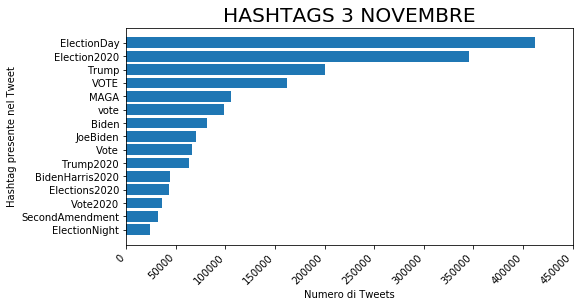

In [34]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 3 Novembre (di quelli raccolti):
test_conteggiogiorno_hashtags_3_nov = dataset_test_3_nov.groupby('hashtags').size().reset_index(name='count')
test_conteggiogiorno_hashtags_3_nov = pd.DataFrame(test_conteggiogiorno_hashtags_3_nov).sort_values(by=['count'], ascending = True)
test_conteggiogiorno_hashtags_3_nov_top15 = test_conteggiogiorno_hashtags_3_nov.tail(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(test_conteggiogiorno_hashtags_3_nov_top15['hashtags'], test_conteggiogiorno_hashtags_3_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 450000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 3 NOVEMBRE')

In [35]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 3 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_test_3_nov_hashtags_trump = dataset_test_3_nov.loc[(dataset_test_3_nov['hashtags'] == "Trump") | (dataset_test_3_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_test_3_nov_hashtags_trump.index)) + " tweets")
dataset_test_3_nov_hashtags_biden = dataset_test_3_nov.loc[(dataset_test_3_nov['hashtags'] == "Biden") | (dataset_test_3_nov['hashtags'] == "JoeBiden" ) | (dataset_test_3_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_test_3_nov_hashtags_biden.index)) + " tweets")

dataset_test_3_nov_hashtags_trump_nod = dataset_test_3_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_test_3_nov_hashtags_trump_nod.index)) + " tweets")
dataset_test_3_nov_hashtags_biden_nod = dataset_test_3_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_test_3_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono 263849 tweets
Nel dataset con duplicati, tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 196562 tweets
[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono: 194384 tweets
[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 164248 tweets


In [36]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']
def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']
def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden', 'Trump', 'Donald', 'Trump2020', 'trump']

def matchertotale(x):
    for i in parole_testo:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_3_nov_words_trump = dataset_unico_3_nov[dataset_unico_3_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_test_3_nov['Match_parola_trump'] = dataset_test_3_nov['Text_clean_1'].apply(matcherTrump)
dataset_test_3_nov['Match_parola_biden'] = dataset_test_3_nov['Text_clean_1'].apply(matcherBiden)
dataset_test_3_nov['Match_parola'] = dataset_test_3_nov['Text_clean_1'].apply(matchertotale)
dataset_test_3_nov = dataset_test_3_nov[dataset_test_3_nov['Match_parola'].notna()]


dataset_test_3_nov_words_trump = dataset_test_3_nov.loc[ (dataset_test_3_nov['Match_parola_trump'] == "Trump") | (dataset_test_3_nov['Match_parola_trump'] == "Donald") | (dataset_test_3_nov['Match_parola_trump'] == "Trump2020") | (dataset_test_3_nov['Match_parola_trump'] == "trump")]
dataset_test_3_nov_words_trump = dataset_test_3_nov_words_trump.loc[ (dataset_test_3_nov_words_trump['Match_parola'] == "Trump") | (dataset_test_3_nov_words_trump['Match_parola'] == "Donald") | (dataset_test_3_nov_words_trump['Match_parola'] == "Trump2020") | (dataset_test_3_nov_words_trump['Match_parola'] == "trump")]
dataset_test_3_nov_words_trump = dataset_test_3_nov_words_trump[dataset_test_3_nov_words_trump['Match_parola_biden'].isnull()]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_test_3_nov_words_trump_nod = dataset_test_3_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_test_3_nov_words_trump_nod = remove_unwanted_cols(dataset_test_3_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_test_3_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_test_3_nov_words_biden = dataset_test_3_nov.loc[(dataset_test_3_nov['Match_parola_biden'] == "Biden") | (dataset_test_3_nov['Match_parola_biden'] == "Joe Biden") | (dataset_test_3_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_test_3_nov['Match_parola_biden'] == "biden") | (dataset_test_3_nov['Match_parola_biden'] == "Biden2020")]
dataset_test_3_nov_words_biden = dataset_test_3_nov_words_biden.loc[(dataset_test_3_nov_words_biden['Match_parola'] == "Biden") | (dataset_test_3_nov_words_biden['Match_parola'] == "Joe Biden") | (dataset_test_3_nov_words_biden['Match_parola'] == "BidenHarris2020") | (dataset_test_3_nov_words_biden['Match_parola'] == "biden") | (dataset_test_3_nov_words_biden['Match_parola'] == "Biden2020")]
dataset_test_3_nov_words_biden = dataset_test_3_nov_words_biden[dataset_test_3_nov_words_biden['Match_parola_trump'].isnull()]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_test_3_nov_words_biden_nod = dataset_test_3_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_test_3_nov_words_biden_nod = remove_unwanted_cols(dataset_test_3_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_test_3_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 86101 tweets
[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 27742 tweets


In [37]:
#[CREAZIONE DATASET FINALE CON TWEETS DEL 3 NOVEMBRE RIFERITI A TRUMP]
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_3_nov_test_trump = pd.concat([dataset_test_3_nov_words_trump_nod, dataset_test_3_nov_hashtags_trump_nod])
_3_nov_test_trump_FIN = _3_nov_test_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 3 Novembre, vi sono:" + str(len(_3_nov_test_trump_FIN.index)) + " tweets")

#BIDEN:
_3_nov_test_biden = pd.concat([dataset_test_3_nov_words_biden_nod, dataset_test_3_nov_hashtags_biden_nod])
_3_nov_test_biden_FIN = _3_nov_test_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 3 Novembre, vi sono:" + str(len(_3_nov_test_biden_FIN.index)) + " tweets")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Nel dataset finale relativo a Trump, del 3 Novembre, vi sono:235467 tweets


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Nel dataset finale relativo a Biden, del 3 Novembre, vi sono:178753 tweets


In [38]:
df_3nov_biden_sample = _3_nov_test_biden_FIN.sample(frac=0.50, replace=True, random_state=1)
df_3nov_trump_sample = _3_nov_test_trump_FIN.sample(frac=0.50, replace=True, random_state=1)

In [39]:
print("Tweets presenti nel dataset sul quale lavoreremo del 3 Novembre legati a Trump: " + str(len(df_3nov_trump_sample)))
print("Tweets presenti nel dataset sul quale lavoreremo del 3 Novembre legati a Biden: " + str(len(df_3nov_biden_sample)))

Tweets presenti nel dataset sul quale lavoreremo del 3 Novembre legati a Trump: 117734
Tweets presenti nel dataset sul quale lavoreremo del 3 Novembre legati a Biden: 89376


# ANALISI GIORNO 7 NOVEMBRE #

In [26]:
dataset_test_7_nov.head(5)

Date_time  Followers Hashtags                      Position  \
0 2020-11-07 18:42:34        138      NaN  somewhere Himalaya or hawaii   
1 2020-11-07 18:42:34         21      NaN                           NaN   
2 2020-11-07 18:42:34        810      NaN                           NaN   
2 2020-11-07 18:42:34        810      NaN                           NaN   
3 2020-11-07 18:42:34        342      NaN                        Bombay   

     Screen_name                                               Text  \
0    Stay_Safe__                   Dance Of Democracy #Election2020   
1     kakumopapl  RT @Reuters: Democrat Joe Biden wins #Election...   
2    donpresson3  RT @DStudentOnline: @DFBHarvard I knew it! Tru...   
2    donpresson3  RT @DStudentOnline: @DFBHarvard I knew it! Tru...   
3  HighnPositive  Congratulations America! \n\n#PresidentElectJo...   

                                    _id                hashtags  Novembre  \
0  ObjectId("5fa6ea9f73183f3509cb9853")            Election2020         7   
1  ObjectId("5fa6eaa073183f3509cb9854")            Election2020         7   
2  ObjectId("5fa6eaa073183f3509cb9855")  TRUMP2020ToSaveAmerica         7   
2  ObjectId("5fa6eaa073183f3509cb9855")            Election2020         7   
3  ObjectId("5fa6eaa073183f3509cb9856")       PresidentElectJoe         7   

                                        Text_clean_1  
0             [Dance, Of, Democracy, Election, 2020]  
1   [RT, Democrat, Joe, Biden, wins, Election, 2020]  
2  [RT, I, knew, Trump, biggest, landslide, histo...  
2  [RT, I, knew, Trump, biggest, landslide, histo...  
3  [Congratulations, America, nnPresidentElectJoe...

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0, 850000),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 7 NOVEMBRE')]

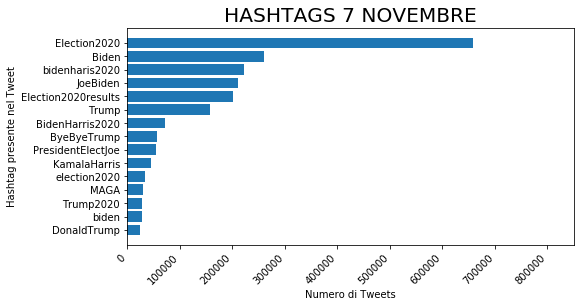

In [27]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 7 Novembre (di quelli raccolti):
test_conteggiogiorno_hashtags_7_nov = dataset_test_7_nov.groupby('hashtags').size().reset_index(name='count')
test_conteggiogiorno_hashtags_7_nov = pd.DataFrame(test_conteggiogiorno_hashtags_7_nov).sort_values(by=['count'], ascending = True)
test_conteggiogiorno_hashtags_7_nov_top15 = test_conteggiogiorno_hashtags_7_nov.tail(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(test_conteggiogiorno_hashtags_7_nov_top15['hashtags'], test_conteggiogiorno_hashtags_7_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 850000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 7 NOVEMBRE')

In [28]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 7 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_test_7_nov_hashtags_trump = dataset_test_7_nov.loc[(dataset_test_7_nov['hashtags'] == "Trump") | (dataset_test_7_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_test_7_nov_hashtags_trump.index)) + " tweets")
dataset_test_7_nov_hashtags_biden = dataset_test_7_nov.loc[(dataset_test_7_nov['hashtags'] == "Biden") | (dataset_test_7_nov['hashtags'] == "JoeBiden" ) | (dataset_test_7_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_test_7_nov_hashtags_biden.index)) + " tweets")

dataset_test_7_nov_hashtags_trump_nod = dataset_test_7_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_test_7_nov_hashtags_trump_nod.index)) + " tweets")
dataset_test_7_nov_hashtags_biden_nod = dataset_test_7_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_test_7_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono 184623 tweets
Nel dataset con duplicati, tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 544917 tweets
[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono: 159643 tweets
[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 458712 tweets


In [29]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']
def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']
def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden', 'Trump', 'Donald', 'Trump2020', 'trump']

def matchertotale(x):
    for i in parole_testo:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_3_nov_words_trump = dataset_unico_3_nov[dataset_unico_3_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_test_7_nov['Match_parola_trump'] = dataset_test_7_nov['Text_clean_1'].apply(matcherTrump)
dataset_test_7_nov['Match_parola_biden'] = dataset_test_7_nov['Text_clean_1'].apply(matcherBiden)
dataset_test_7_nov['Match_parola'] = dataset_test_7_nov['Text_clean_1'].apply(matchertotale)
dataset_test_7_nov = dataset_test_7_nov[dataset_test_7_nov['Match_parola'].notna()]


dataset_test_7_nov_words_trump = dataset_test_7_nov.loc[ (dataset_test_7_nov['Match_parola_trump'] == "Trump") | (dataset_test_7_nov['Match_parola_trump'] == "Donald") | (dataset_test_7_nov['Match_parola_trump'] == "Trump2020") | (dataset_test_7_nov['Match_parola_trump'] == "trump")]
dataset_test_7_nov_words_trump = dataset_test_7_nov_words_trump.loc[ (dataset_test_7_nov_words_trump['Match_parola'] == "Trump") | (dataset_test_7_nov_words_trump['Match_parola'] == "Donald") | (dataset_test_7_nov_words_trump['Match_parola'] == "Trump2020") | (dataset_test_7_nov_words_trump['Match_parola'] == "trump")]
dataset_test_7_nov_words_trump = dataset_test_7_nov_words_trump[dataset_test_7_nov_words_trump['Match_parola_biden'].isnull()]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_test_7_nov_words_trump_nod = dataset_test_7_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_test_7_nov_words_trump_nod = remove_unwanted_cols(dataset_test_7_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_test_7_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_test_7_nov_words_biden = dataset_test_7_nov.loc[(dataset_test_7_nov['Match_parola_biden'] == "Biden") | (dataset_test_7_nov['Match_parola_biden'] == "Joe Biden") | (dataset_test_7_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_test_7_nov['Match_parola_biden'] == "biden") | (dataset_test_7_nov['Match_parola_biden'] == "Biden2020")]
dataset_test_7_nov_words_biden = dataset_test_7_nov_words_biden.loc[(dataset_test_7_nov_words_biden['Match_parola'] == "Biden") | (dataset_test_7_nov_words_biden['Match_parola'] == "Joe Biden") | (dataset_test_7_nov_words_biden['Match_parola'] == "BidenHarris2020") | (dataset_test_7_nov_words_biden['Match_parola'] == "biden") | (dataset_test_7_nov_words_biden['Match_parola'] == "Biden2020")]
dataset_test_7_nov_words_biden = dataset_test_7_nov_words_biden[dataset_test_7_nov_words_biden['Match_parola_trump'].isnull()]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_test_7_nov_words_biden_nod = dataset_test_7_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_test_7_nov_words_biden_nod = remove_unwanted_cols(dataset_test_7_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_test_7_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 114169 tweets
[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 203888 tweets


In [30]:
#[CREAZIONE DATASET FINALE CON TWEETS DEL 7 NOVEMBRE RIFERITI A TRUMP]
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_7_nov_test_trump = pd.concat([dataset_test_7_nov_words_trump_nod, dataset_test_7_nov_hashtags_trump_nod])
_7_nov_test_trump_FIN = _7_nov_test_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 7 Novembre, vi sono:" + str(len(_7_nov_test_trump_FIN.index)) + " tweets")

#BIDEN:
_7_nov_test_biden = pd.concat([dataset_test_7_nov_words_biden_nod, dataset_test_7_nov_hashtags_biden_nod])
_7_nov_test_biden_FIN = _7_nov_test_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 7 Novembre, vi sono:" + str(len(_7_nov_test_biden_FIN.index)) + " tweets")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Nel dataset finale relativo a Trump, del 7 Novembre, vi sono:229441 tweets


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Nel dataset finale relativo a Biden, del 7 Novembre, vi sono:555406 tweets


In [31]:
df_7nov_biden_sample = _7_nov_test_biden_FIN.sample(frac=0.50, replace=True, random_state=1)
df_7nov_trump_sample = _7_nov_test_trump_FIN.sample(frac=0.50, replace=True, random_state=1)

In [32]:
print("Tweets presenti nel dataset sul quale lavoreremo del 7 Novembre legati a Trump: " + str(len(df_7nov_trump_sample)))
print("Tweets presenti nel dataset sul quale lavoreremo del 7 Novembre legati a Biden: " + str(len(df_7nov_biden_sample)))

Tweets presenti nel dataset sul quale lavoreremo del 7 Novembre legati a Trump: 114720
Tweets presenti nel dataset sul quale lavoreremo del 7 Novembre legati a Biden: 277703


# ANALISI GRAFI E RELAZIONI #

In [40]:
#LIBRERIE UTILI PER ANALISI GRAFI
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
from operator import itemgetter
import cairocffi as cairo
from igraph import *

In [41]:
from matplotlib.pyplot import figure
from igraph import *

In [42]:
#Degree centrality:
from networkx import degree_centrality

In [43]:
from networkx import closeness_centrality

In [44]:
from networkx import betweenness_centrality

# ANALISI NETWORK E GRAFI 3 NOVEMBRE TEST #

In [45]:
import seaborn as sns
from community import community_louvain


In [46]:
from networkx import degree_centrality
from networkx import closeness_centrality
import math
from networkx import betweenness_centrality
import cairocffi as cairo
from igraph import *
from matplotlib.pyplot import figure
from igraph import *

#LIBRERIE UTILI PER ANALISI GRAFI
import csv
from operator import itemgetter
import networkx as nx 
from operator import itemgetter
import cairocffi as cairo
from igraph import *

import random
import itertools 
import stats

from networkx.algorithms.approximation.dominating_set import min_weighted_dominating_set, min_edge_dominating_set
import community
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numbers
import os.path
from math import pi
from operator import itemgetter
import matplotlib.colors as colors
import matplotlib.cm as cm
from collections import Counter, defaultdict
from networkx.drawing.nx_agraph import graphviz_layout

In [47]:
len(df_3nov_biden_sample)


89376

In [48]:
len(df_3nov_trump_sample)


117734

In [49]:
#Costruisco i dataset che saranno utilizzati per effettuare l'analisi dei grafi di trump e biden del 3 novembre. 
_3_nov_grafianalysis_trump_retweet = df_3nov_trump_sample
_3_nov_grafianalysis_biden_retweet = df_3nov_biden_sample


In [50]:
#[PARTIAMO DALL'ANALISI DEI RETWEET CON UN Pò DI INFORMAZIONI:]
_3_nov_grafianalysis_trump_retweet["retweet"] = _3_nov_grafianalysis_trump_retweet["Text"].apply(lambda x: re.findall(r"RT @(\w+)", x))
_3_nov_grafianalysis_trump_retweet["retweet_puliti"] = _3_nov_grafianalysis_trump_retweet.retweet.apply(', '.join)

_3_nov_grafianalysis_biden_retweet["retweet"] = _3_nov_grafianalysis_biden_retweet["Text"].apply(lambda x: re.findall(r"RT @(\w+)", x))
_3_nov_grafianalysis_biden_retweet["retweet_puliti"] = _3_nov_grafianalysis_biden_retweet.retweet.apply(', '.join)

#Andiamo a rimpiazzare con un NaN se non vi sono dei valori per quanto riguarda i retweets:
_3_nov_grafianalysis_biden_retweet.retweet_puliti.replace(r'^\s*$', np.nan, regex=True, inplace = True)
_3_nov_grafianalysis_trump_retweet.retweet_puliti.replace(r'^\s*$', np.nan, regex=True, inplace = True)

#Vengono rimossi tutti i tweets che non presentano dei RT:
_3_nov_grafianalysis_biden_retweet = _3_nov_grafianalysis_biden_retweet[_3_nov_grafianalysis_biden_retweet.retweet_puliti.notna()]
_3_nov_grafianalysis_trump_retweet = _3_nov_grafianalysis_trump_retweet[_3_nov_grafianalysis_trump_retweet.retweet_puliti.notna()]

In [51]:
#Resetto gli index da zero in ordine crescente:
_3_nov_grafianalysis_biden_retweet = _3_nov_grafianalysis_biden_retweet.reset_index(drop = True)
_3_nov_grafianalysis_trump_retweet = _3_nov_grafianalysis_trump_retweet.reset_index(drop = True)

In [53]:
#VADO A CREARE CON NETWROKX UN OGGETTO GRAFO [TRUMP]:
G_trump_networkx = nx.from_pandas_edgelist(_3_nov_grafianalysis_trump_retweet, 'Screen_name', 'retweet_puliti')

In [54]:
#VADO A CREARE CON NETWROKX UN OGGETTO GRAFO [TRUMP]:
G_biden_networkx = nx.from_pandas_edgelist(_3_nov_grafianalysis_biden_retweet, 'Screen_name', 'retweet_puliti')

In [55]:
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet [BIDEN]:
leaderboard_biden_retweet = {}
for x in G_biden_networkx.nodes:
 leaderboard_biden_retweet[x] = len(G_biden_networkx[x])
s_biden_retweet = pd.Series(leaderboard_biden_retweet, name='connections')
_3_nov_grafianalysis_biden_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
_3_nov_grafianalysis_biden_retweet_leaderboard = _3_nov_grafianalysis_biden_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
_3_nov_grafianalysis_biden_retweet_leaderboard.head()

Screen_name  connessioni
0  RealJamesWoods         3789
1      w_terrence         1476
2  MichaelCoudrey          906
3      DanScavino          565
4       JakeLobin          469

In [56]:
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet [TRUMP]:
leaderboard_trump_retweet = {}
for x in G_trump_networkx.nodes:
 leaderboard_trump_retweet[x] = len(G_trump_networkx[x])
s_trump_retweet = pd.Series(leaderboard_trump_retweet, name='connections')
_3_nov_grafianalysis_trump_retweet_leaderboard = s_trump_retweet.to_frame().sort_values('connections', ascending=False)
_3_nov_grafianalysis_trump_retweet_leaderboard = _3_nov_grafianalysis_trump_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
_3_nov_grafianalysis_trump_retweet_leaderboard.head()

Screen_name  connessioni
0   RealJamesWoods         2893
1       w_terrence         1734
2   MichaelCoudrey         1164
3         LouDobbs          932
4  YourAnonCentral          928

In [57]:
#Creazione dataset con prime tot persone con maggiori connessioni:
_3_nov_grafianalysis_trump_retweet_leaderboard_primi1k = _3_nov_grafianalysis_trump_retweet_leaderboard.head(1000)
_3_nov_grafianalysis_biden_retweet_leaderboard_primi1k = _3_nov_grafianalysis_biden_retweet_leaderboard.head(1000)

In [58]:
#Vado a creare i nodi per quanto riguarda i primi 1000 utenti che hanno effettuato maggiori connessioni:
screen_name_primi1k_trump_connessioni = _3_nov_grafianalysis_trump_retweet_leaderboard_primi1k["Screen_name"]
screen_name_primi1k_trump_connessioni = screen_name_primi1k_trump_connessioni.to_list()

screen_name_primi1k_biden_connessioni = _3_nov_grafianalysis_biden_retweet_leaderboard_primi1k["Screen_name"]
screen_name_primi1k_biden_connessioni = screen_name_primi1k_biden_connessioni.to_list()

In [59]:
#Codice per dire di estrapolare i nomi solamente di quelli contenuti all'interno della lista:
df_1knodiconpiùconnessioni_trump = _3_nov_grafianalysis_trump_retweet[_3_nov_grafianalysis_trump_retweet['Screen_name'].isin(screen_name_primi1k_trump_connessioni)]
df_1knodiconpiùconnessioni_biden = _3_nov_grafianalysis_biden_retweet[_3_nov_grafianalysis_biden_retweet['Screen_name'].isin(screen_name_primi1k_biden_connessioni)]

In [60]:
#Creazione nodi complessivi:
nodi_screen_trump_3_nov_intero =_3_nov_grafianalysis_trump_retweet['Screen_name'].tolist()
nodi_screen_biden_3_nov_intero =_3_nov_grafianalysis_biden_retweet['Screen_name'].tolist()

In [61]:
#Vado a estrapolare i nodi dei primi 1000 utenti più connessi:
df_1knodiconpiùconnessioni_screen_nodi_trump = df_1knodiconpiùconnessioni_trump['Screen_name'].tolist()
df_1knodiconpiùconnessioni_screen_nodi_biden = df_1knodiconpiùconnessioni_biden['Screen_name'].tolist()

In [62]:
#Creazione nodi complessivi:
nodi_retweet_trump_3_nov_intero =_3_nov_grafianalysis_trump_retweet['retweet_puliti'].tolist()
nodi_retweet_biden_3_nov_intero =_3_nov_grafianalysis_biden_retweet['retweet_puliti'].tolist()

In [63]:
#Vado a trovare i nodi delle persone retweettate:
df_1knodiconpiùconnessioni_retweet_nodi_trump = df_1knodiconpiùconnessioni_trump['retweet_puliti'].tolist()
df_1knodiconpiùconnessioni_retweet_nodi_biden = df_1knodiconpiùconnessioni_biden['retweet_puliti'].tolist()

In [64]:
#Vado a costruire i nodi complessivi:
nodi_trump_3_nov = nodi_screen_trump_3_nov_intero + nodi_retweet_trump_3_nov_intero
nodi_trump_3_nov_DEF = []
[nodi_trump_3_nov_DEF.append(item) for item in nodi_trump_3_nov if item not in nodi_trump_3_nov_DEF]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [65]:
#Vado a costruire i nodi complessivi:
nodi_biden_3_nov = nodi_screen_biden_3_nov_intero + nodi_retweet_biden_3_nov_intero
nodi_biden_3_nov_DEF = []
[nodi_biden_3_nov_DEF.append(item) for item in nodi_biden_3_nov if item not in nodi_biden_3_nov_DEF]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [66]:
#Costuiscono i nodi complessivi ma per il dataset di 1k connessioni maggiori:
df_1knodiconpiùconnessioni_trump_nodi = df_1knodiconpiùconnessioni_screen_nodi_trump + df_1knodiconpiùconnessioni_retweet_nodi_trump
df_1knodiconpiùconnessioni_trump_nodi_DEF = []
[df_1knodiconpiùconnessioni_trump_nodi_DEF.append(item) for item in df_1knodiconpiùconnessioni_trump_nodi if item not in df_1knodiconpiùconnessioni_trump_nodi_DEF]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [67]:
#Costuiscono i nodi complessivi ma per il dataset di 1k connessioni maggiori:
df_1knodiconpiùconnessioni_biden_nodi = df_1knodiconpiùconnessioni_screen_nodi_biden + df_1knodiconpiùconnessioni_retweet_nodi_biden
df_1knodiconpiùconnessioni_biden_nodi_DEF = []
[df_1knodiconpiùconnessioni_biden_nodi_DEF.append(item) for item in df_1knodiconpiùconnessioni_biden_nodi if item not in df_1knodiconpiùconnessioni_biden_nodi_DEF]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [68]:
#Vado a sistemare il dataset di riferimento per la costruzione delle relazioni con gli utenti con più connessioni
df_1knodiconpiùconnessioni_trump['Edges'] = 1
df_1knodiconpiùconnessioni_trump['test'] = df_1knodiconpiùconnessioni_trump[['Screen_name', 'retweet_puliti']].values.tolist()
df_1knodiconpiùconnessioni_trump = df_1knodiconpiùconnessioni_trump.reset_index(drop = True)
df_1knodiconpiùconnessioni_trump.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date_time  Followers Hashtags Match_parola Match_parola_biden  \
0 2020-11-03 16:28:11       8980      NaN          NaN                NaN   
1 2020-11-03 20:57:37      40916      NaN          NaN                NaN   
2 2020-11-03 13:59:36       1030      NaN          NaN                NaN   
3 2020-11-03 21:03:54        295      NaN          NaN                NaN   
4 2020-11-03 13:57:02       1030      NaN          NaN                NaN   

  Match_parola_trump  Novembre                    Position      Screen_name  \
0                NaN         3                 USA-AMERICA    Dougsjourney7   
1                NaN         3  Florida Central West Coast       PuestoLoco   
2                NaN         3                 Kansas, USA      nicegirlnks   
3                NaN         3               Baltimore, MD  ChuckMa10442409   
4                NaN         3                 Kansas, USA      nicegirlnks   

                                                Text  \
0  RT @robsmithonline: This #Election2020 I voted...   
1  RT @FrankFigliuzzi1: When your bank wants noth...   
2  RT @texasglamo: All the #FakeNews and most pol...   
3  RT @mschlapp: Sounds like Biden camp realizes ...   
4  RT @KimSwartz15: And so it begins. @Project_Ve...   

                                        Text_clean_1  \
0  [election, 2020, voted, fornnamericannlaw, amp...   
1  [bank, wants, nothing, exclusive, tired, trump...   
2  [fakenews, pollsters, saying, huge, earlyvotin...   
3  [sounds, like, biden, camp, realizes, missed, ...   
4                   [begins, please, advise, voters]   

                                    _id   hashtags            retweet  \
0  ObjectId("5fa18520b3c9fb571d8682a3")      Trump   [robsmithonline]   
1  ObjectId("5fa1c446d575bb2e4201f591")      Trump  [FrankFigliuzzi1]   
2  ObjectId("5fa1624db7255a07253c5fd5")      Trump       [texasglamo]   
3  ObjectId("5fa1c5bfd575bb2e42021015")      Trump         [mschlapp]   
4  ObjectId("5fa161b3b7255a07253c55c2")  Trump2020      [KimSwartz15]   

    retweet_puliti  Edges                             test  
0   robsmithonline      1  [Dougsjourney7, robsmithonline]  
1  FrankFigliuzzi1      1    [PuestoLoco, FrankFigliuzzi1]  
2       texasglamo      1        [nicegirlnks, texasglamo]  
3         mschlapp      1      [ChuckMa10442409, mschlapp]  
4      KimSwartz15      1       [nicegirlnks, KimSwartz15]

In [69]:
#Creo gli edges per quanto riguarda il dataset intero
edges_retweet_trump_3_nov = list(_3_nov_grafianalysis_trump_retweet[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))
edges_retweet_biden_3_nov = list(_3_nov_grafianalysis_biden_retweet[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))

In [70]:
#Vado a creare gli edges per quanto riguarda il dataset 1k
edges_df_1knodiconpiùconnessioni_trump = list(df_1knodiconpiùconnessioni_trump[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))
edges_df_1knodiconpiùconnessioni_biden = list(df_1knodiconpiùconnessioni_biden[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))

In [73]:
#Prima rappresentazione retweet:
g_3nov_trump_retweet = Graph(directed=True)
g_3nov_trump_retweet.add_vertices(nodi_trump_3_nov_DEF)
g_3nov_trump_retweet.add_edges(edges_retweet_trump_3_nov)
#Eventuale visualizzazione:
#style = {}
#style["edge_curved"] = False
#style["vertex_size"] = 4
#plot(g_3nov_trump_retweet, **style)

In [74]:
#Prima rappresentazione retweet:
g_3nov_biden_retweet = Graph(directed=True)
g_3nov_biden_retweet.add_vertices(nodi_biden_3_nov_DEF)
g_3nov_biden_retweet.add_edges(edges_retweet_biden_3_nov)
#Eventuale visualizzazione:
#style = {}
#style["edge_curved"] = False
#style["vertex_size"] = 4
#plot(g_3nov_biden_retweet, **style)

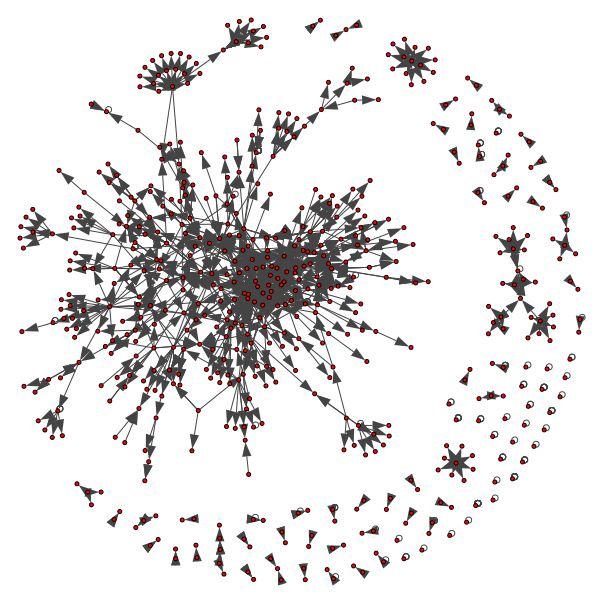

In [75]:
#Prima rappresentazione retweet [TRUMP]:
g_1k_trump_3nov = Graph(directed=True)
g_1k_trump_3nov.add_vertices(df_1knodiconpiùconnessioni_trump_nodi_DEF)
g_1k_trump_3nov.add_edges(edges_df_1knodiconpiùconnessioni_trump)
style = {}
style["edge_curved"] = False
style["vertex_size"] = 4
plot(g_1k_trump_3nov, **style)

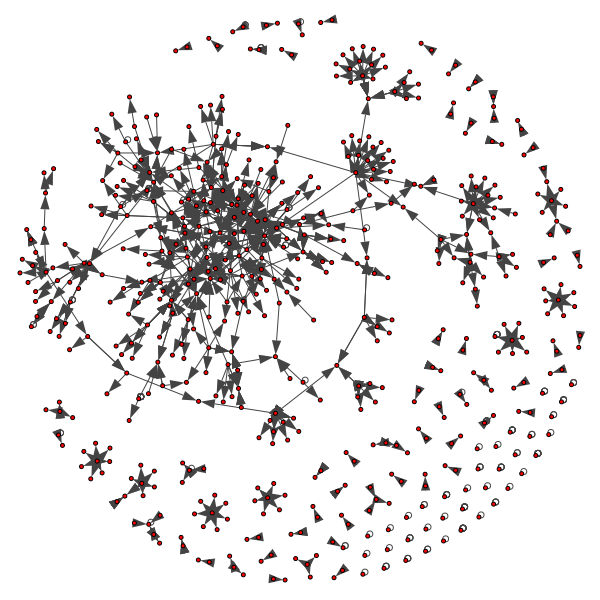

In [76]:
#Prima rappresentazione retweet [BIDEN]:
g_1k_biden_3nov = Graph(directed=True)
g_1k_biden_3nov.add_vertices(df_1knodiconpiùconnessioni_biden_nodi_DEF)
g_1k_biden_3nov.add_edges(edges_df_1knodiconpiùconnessioni_biden)
style = {}
style["edge_curved"] = False
style["vertex_size"] = 4
plot(g_1k_biden_3nov, **style)

In [77]:
#Costruzione informazioni network con Network:
#[trump]
G_network_trump_3nov = nx.Graph()
G_network_trump_3nov.add_nodes_from(nodi_trump_3_nov_DEF)
G_network_trump_3nov.add_edges_from(edges_retweet_trump_3_nov)
#[biden]
G_network_biden_3nov = nx.Graph()
G_network_biden_3nov.add_nodes_from(nodi_biden_3_nov_DEF)
G_network_biden_3nov.add_edges_from(edges_retweet_biden_3_nov)

In [78]:
#Costruzione network con nx 1 K:
#[TRUMP]
G_network_1k_trump_3nov = nx.Graph()
G_network_1k_trump_3nov.add_nodes_from(df_1knodiconpiùconnessioni_trump_nodi_DEF)
G_network_1k_trump_3nov.add_edges_from(edges_df_1knodiconpiùconnessioni_trump)

#[BIDEN]
G_network_1k_biden_3nov = nx.Graph()
G_network_1k_biden_3nov.add_nodes_from(df_1knodiconpiùconnessioni_biden_nodi_DEF)
G_network_1k_biden_3nov.add_edges_from(edges_df_1knodiconpiùconnessioni_biden)

In [79]:
#Vado a creare un nuovo dataframe con le informazioni che mi sono utili per poi estrapolare il mio grafo:
df_1knodiconpiùconnessioni_trump_utili = df_1knodiconpiùconnessioni_trump[["Screen_name", "retweet_puliti"]]
df_1knodiconpiùconnessioni_biden_utili = df_1knodiconpiùconnessioni_biden[["Screen_name", "retweet_puliti"]]

In [80]:
#Vado creare il network da nx:
Network_1k_trump_3nov = nx.from_pandas_edgelist(df_1knodiconpiùconnessioni_trump_utili, source='Screen_name', target='retweet_puliti', edge_attr=True,)
Network_1k_biden_3nov = nx.from_pandas_edgelist(df_1knodiconpiùconnessioni_biden_utili, source='Screen_name', target='retweet_puliti', edge_attr=True,)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


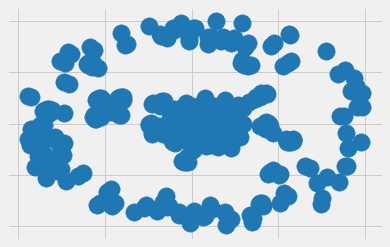

In [81]:
#Rappresentazione ad area:
nx.draw_networkx(Network_1k_trump_3nov, with_labels=False)

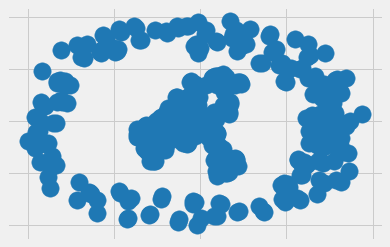

In [82]:
#Rappresentazione ad area:
nx.draw_networkx(Network_1k_biden_3nov, with_labels=False)

In [83]:
#Trasformazione manuale in diretto:
G_network_1k_trump_3nov_directed = G_network_1k_trump_3nov.to_directed()
G_network_1k_biden_3nov_directed = G_network_1k_biden_3nov.to_directed()

In [86]:
#Costruiscono il grafo diretto:
Network_1k_trump_3nov_direct = nx.DiGraph() 
Network_1k_trump_3nov_direct.add_edges_from(edges_df_1knodiconpiùconnessioni_trump)
#Eventuale rappresentazione:
#plt.figure(figsize =(10, 10)) 
#nx.draw_networkx(Network_1k_trump_3nov_direct, node_color ='green') 

In [87]:
#Costruiscono il grafo diretto:
Network_1k_biden_3nov_direct = nx.DiGraph() 
Network_1k_biden_3nov_direct.add_edges_from(edges_df_1knodiconpiùconnessioni_biden)
#Eventuale rappresentazione:
#plt.figure(figsize =(10, 10)) 
#nx.draw_networkx(Network_2k_trump_3nov_direct, node_color ='green') 

In [88]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Informazioni grafo riguardo TRUMP:")
print(nx.info(G_network_trump_3nov))
print("\\\\\\\\")
print("Informazioni grafo riguardo BIDEN:")
print(nx.info(G_network_biden_3nov))


Informazioni grafo riguardo TRUMP:
Name: 
Type: Graph
Number of nodes: 60616
Number of edges: 60134
Average degree:   1.9841
\\\\
Informazioni grafo riguardo BIDEN:
Name: 
Type: Graph
Number of nodes: 47547
Number of edges: 45181
Average degree:   1.9005


In [89]:
#Informazioni network 1k dei due politici:
print(nx.info(G_network_1k_trump_3nov))
print("\\\\\\\\")
print(nx.info(G_network_1k_biden_3nov))


Name: 
Type: Graph
Number of nodes: 572
Number of edges: 787
Average degree:   2.7517
\\\\
Name: 
Type: Graph
Number of nodes: 558
Number of edges: 632
Average degree:   2.2652


In [90]:
#La risposta probabilmente si sarebbe potuta ottenere senza svolgere questi comandi, però viene determinata la connessione del grafo:
print("Il network di Trump del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_trump_3nov))
print("\\\\\\")
print("Il network di Biden del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_biden_3nov))
print("\\\\\\")
print("Il network di Trump 1K del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_1k_trump_3nov))
print("\\\\\\")
print("Il network di Biden 1K del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_1k_biden_3nov))

Il network di Trump del 3 Novembre, sono connessi?
False
\\\
Il network di Biden del 3 Novembre, sono connessi?
False
\\\
Il network di Trump 1K del 3 Novembre, sono connessi?
False
\\\
Il network di Biden 1K del 3 Novembre, sono connessi?
False


In [92]:
#Viene calcolata la densità dei vari network:
density_trump_3nov = nx.density(G_network_trump_3nov)
print("Network density di Trump del 3 Novembre:", density_trump_3nov)
print("\\\\\\")
density_biden_3nov = nx.density(G_network_biden_3nov)
print("Network density di Biden del 3 Novembre:", density_biden_3nov)
print("\\\\\\")
density_trump_3nov_1k = nx.density(G_network_1k_trump_3nov)
print("Network density di Trump 1K del 3 Novembre:", density_trump_3nov_1k)
print("\\\\\\")
density_biden_3nov_1k = nx.density(G_network_1k_biden_3nov)
print("Network density di Biden 1K del 3 Novembre:", density_biden_3nov_1k)

Network density di Trump del 3 Novembre: 3.273276595160047e-05
\\\
Network density di Biden del 3 Novembre: 3.997134190762631e-05
\\\
Network density di Trump 1K del 3 Novembre: 0.004819173820925135
\\\
Network density di Biden 1K del 3 Novembre: 0.00406684555639209


In [93]:
#Density con seconda tipologia di density costruita manualmente:
def density_new(g):
    n = g.number_of_nodes() 
    e = g.number_of_edges() 
    return (2*e)/(n*(n-1))
print(density_new(Network_1k_trump_3nov_direct))
print("\\\\\\\\")
print(density_new(Network_1k_biden_3nov_direct))

0.004868161610718528
\\\\
0.004092585085230015


In [94]:
#Triadic Closure TRUMP:
triadic_closure_trump_3nov = nx.transitivity(G_network_trump_3nov)
print("Triadic closure TRUMP:", triadic_closure_trump_3nov)
print("\\\\\\\\\\\\\\")
triadic_closure_biden_3nov = nx.transitivity(G_network_biden_3nov)
print("Triadic closure BIDEN:", triadic_closure_biden_3nov)
print("\\\\\\\\\\\\\\")
triadic_closure_trump_3nov_1k = nx.transitivity(G_network_1k_trump_3nov)
print("Triadic closure TRUMP:", triadic_closure_trump_3nov_1k)
print("\\\\\\\\\\\\\\")
triadic_closure_biden_3nov_1k = nx.transitivity(G_network_1k_biden_3nov)
print("Triadic closure BIDEN:", triadic_closure_biden_3nov_1k)

Triadic closure TRUMP: 9.04933161537789e-05
\\\\\\\
Triadic closure BIDEN: 2.5965547427927058e-05
\\\\\\\
Triadic closure TRUMP: 0.05870546914199699
\\\\\\\
Triadic closure BIDEN: 0.02394678492239468


[Text(0, 0.5, 'Screen_name'),
 (0, 0.06),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY TRUMP 3 NOVEMBRE INTERO')]

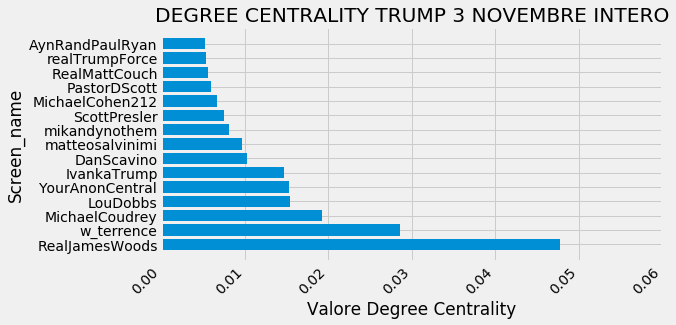

In [95]:
#Degree centrality TRUMP intero:
degree_centrality_trump_3nov = degree_centrality(G_network_trump_3nov)

degree_centrality_trump_3nov = pd.DataFrame.from_dict(degree_centrality_trump_3nov, orient='index')
degree_centrality_trump_3nov = degree_centrality_trump_3nov.reset_index()
degree_centrality_trump_3nov = degree_centrality_trump_3nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_trump_3nov = degree_centrality_trump_3nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_trump_3nov_top15 = degree_centrality_trump_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_trump_3nov_top15['Screen_name'], degree_centrality_trump_3nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.06], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY TRUMP 3 NOVEMBRE INTERO')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.1),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY BIDEN 3 NOVEMBRE INTERO')]

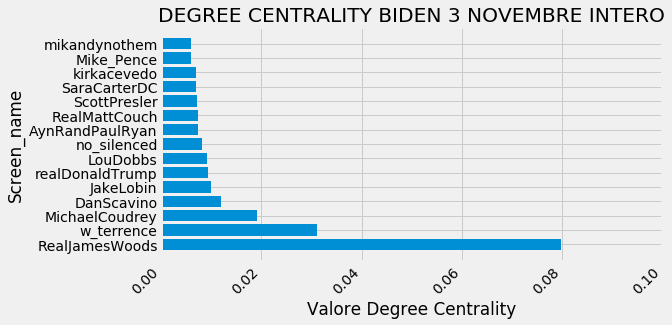

In [97]:
#Degree centrality BIDEN intero:
degree_centrality_biden_3nov = degree_centrality(G_network_biden_3nov)

degree_centrality_biden_3nov = pd.DataFrame.from_dict(degree_centrality_biden_3nov, orient='index')
degree_centrality_biden_3nov = degree_centrality_biden_3nov.reset_index()
degree_centrality_biden_3nov = degree_centrality_biden_3nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_biden_3nov = degree_centrality_biden_3nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_biden_3nov_top15 = degree_centrality_biden_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_biden_3nov_top15['Screen_name'], degree_centrality_biden_3nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.10], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY BIDEN 3 NOVEMBRE INTERO')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.1),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY TRUMP 3 NOVEMBRE 1K')]

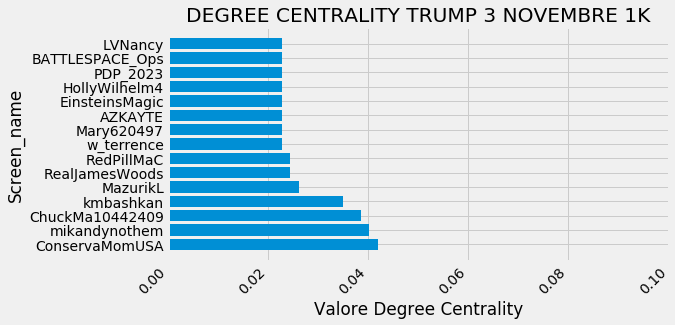

In [99]:
#DEGREE CENTRALITY 1K 3 NOV TRUMP
degree_centrality_1k_trump_3nov = degree_centrality(G_network_1k_trump_3nov)
degree_centrality_1k_trump_3nov = pd.DataFrame.from_dict(degree_centrality_1k_trump_3nov, orient='index')
degree_centrality_1k_trump_3nov = degree_centrality_1k_trump_3nov.reset_index()
degree_centrality_1k_trump_3nov = degree_centrality_1k_trump_3nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_1k_trump_3nov = degree_centrality_1k_trump_3nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_1k_trump_3nov_top15 = degree_centrality_1k_trump_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_1k_trump_3nov_top15['Screen_name'], degree_centrality_1k_trump_3nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.10], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY TRUMP 3 NOVEMBRE 1K')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.1),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY BIDEN 3 NOVEMBRE 1K')]

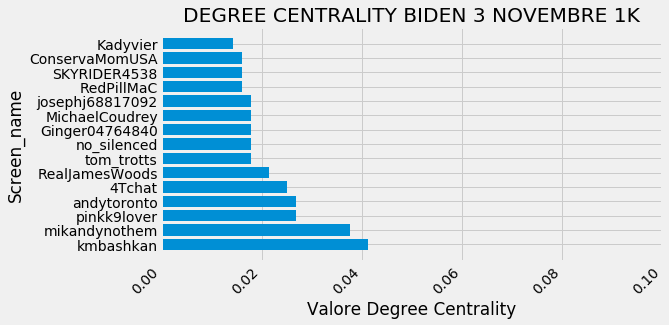

In [100]:
#DEGREE CENTRALITY 1K 3 NOV BIDEN
degree_centrality_1k_biden_3nov = degree_centrality(G_network_1k_biden_3nov)
degree_centrality_1k_biden_3nov = pd.DataFrame.from_dict(degree_centrality_1k_biden_3nov, orient='index')
degree_centrality_1k_biden_3nov = degree_centrality_1k_biden_3nov.reset_index()
degree_centrality_1k_biden_3nov = degree_centrality_1k_biden_3nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_1k_biden_3nov = degree_centrality_1k_biden_3nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_1k_biden_3nov_top15 = degree_centrality_1k_biden_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_1k_biden_3nov_top15['Screen_name'], degree_centrality_1k_biden_3nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.10], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY BIDEN 3 NOVEMBRE 1K')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Closeness Centrality'),
 Text(0.5, 1.0, 'CLOSENESS CENTRALITY 1K TRUMP 3 NOVEMBRE')]

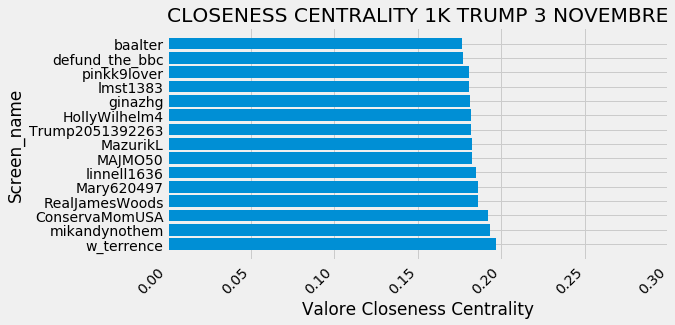

In [101]:
#CLOSENESS CENTRALITY TRUMP 1K 3NOV:
closeness_centrality_1k_trump_3nov = closeness_centrality(G_network_1k_trump_3nov, u=None, wf_improved=True)

closeness_centrality_1k_trump_3nov = pd.DataFrame.from_dict(closeness_centrality_1k_trump_3nov, orient='index')
closeness_centrality_1k_trump_3nov = closeness_centrality_1k_trump_3nov.reset_index()
closeness_centrality_1k_trump_3nov = closeness_centrality_1k_trump_3nov.rename(columns={"index": "Screen_name", 0 : "closeness_centrality"})
closeness_centrality_1k_trump_3nov = closeness_centrality_1k_trump_3nov.sort_values(by=['closeness_centrality'], ascending=False).reset_index(drop=True)

closeness_centrality_1k_trump_3nov_top15 = closeness_centrality_1k_trump_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(closeness_centrality_1k_trump_3nov_top15['Screen_name'], closeness_centrality_1k_trump_3nov_top15['closeness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Closeness Centrality', ylabel='Screen_name',
       title='CLOSENESS CENTRALITY 1K TRUMP 3 NOVEMBRE')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Closeness Centrality'),
 Text(0.5, 1.0, 'CLOSENESS CENTRALITY 1K BIDEN 3 NOVEMBRE')]

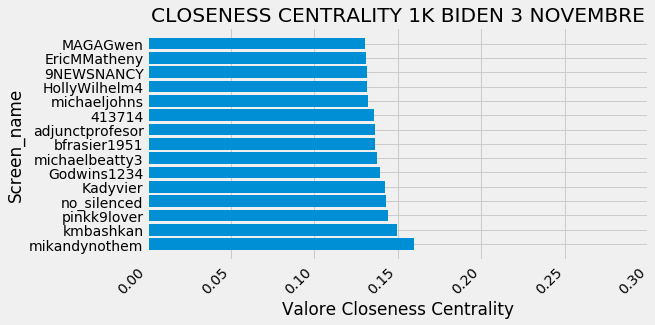

In [102]:
#CLOSENESS CENTRALITY BIDEN 1K 3NOV:
closeness_centrality_1k_biden_3nov = closeness_centrality(G_network_1k_biden_3nov, u=None, wf_improved=True)

closeness_centrality_1k_biden_3nov = pd.DataFrame.from_dict(closeness_centrality_1k_biden_3nov, orient='index')
closeness_centrality_1k_biden_3nov = closeness_centrality_1k_biden_3nov.reset_index()
closeness_centrality_1k_biden_3nov = closeness_centrality_1k_biden_3nov.rename(columns={"index": "Screen_name", 0 : "closeness_centrality"})
closeness_centrality_1k_biden_3nov = closeness_centrality_1k_biden_3nov.sort_values(by=['closeness_centrality'], ascending=False).reset_index(drop=True)

closeness_centrality_1k_biden_3nov_top15 = closeness_centrality_1k_biden_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(closeness_centrality_1k_biden_3nov_top15['Screen_name'], closeness_centrality_1k_biden_3nov_top15['closeness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Closeness Centrality', ylabel='Screen_name',
       title='CLOSENESS CENTRALITY 1K BIDEN 3 NOVEMBRE')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Betweenness Centrality'),
 Text(0.5, 1.0, 'BETWEENNESS CENTRALITY TRUMP 3 NOVEMBRE 1K')]

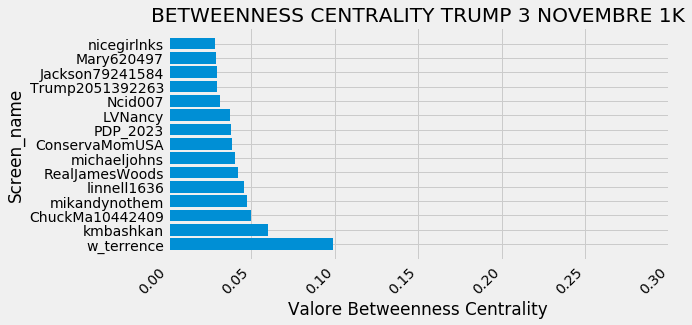

In [103]:
#BETWEENESS CENTRALITY TRUMP 1k 3nov:
betweenness_centrality_1k_trump_3nov = betweenness_centrality(G_network_1k_trump_3nov)

betweenness_centrality_1k_trump_3nov = pd.DataFrame.from_dict(betweenness_centrality_1k_trump_3nov, orient='index')
betweenness_centrality_1k_trump_3nov = betweenness_centrality_1k_trump_3nov.reset_index()
betweenness_centrality_1k_trump_3nov = betweenness_centrality_1k_trump_3nov.rename(columns={"index": "Screen_name", 0 : "betweenness_centrality"})
betweenness_centrality_1k_trump_3nov = betweenness_centrality_1k_trump_3nov.sort_values(by=['betweenness_centrality'], ascending=False).reset_index(drop=True)

betweenness_centrality_1k_trump_3nov_top15 = betweenness_centrality_1k_trump_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(betweenness_centrality_1k_trump_3nov_top15['Screen_name'], betweenness_centrality_1k_trump_3nov_top15['betweenness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Betweenness Centrality', ylabel='Screen_name',
       title='BETWEENNESS CENTRALITY TRUMP 3 NOVEMBRE 1K')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Betweenness Centrality'),
 Text(0.5, 1.0, 'BETWEENNESS CENTRALITY BIDEN 3 NOVEMBRE 1K')]

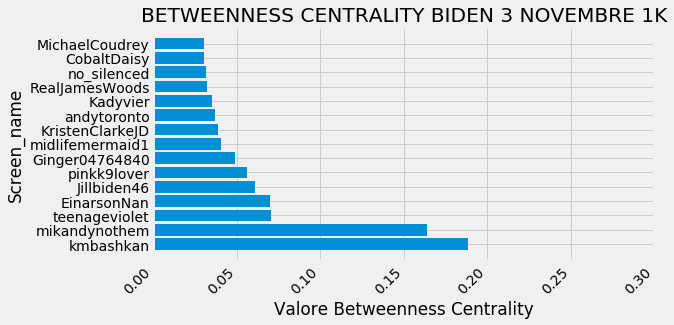

In [104]:
#BETWEENESS CENTRALITY BIDEN 1k 3nov:
betweenness_centrality_1k_biden_3nov = betweenness_centrality(G_network_1k_biden_3nov)

betweenness_centrality_1k_biden_3nov = pd.DataFrame.from_dict(betweenness_centrality_1k_biden_3nov, orient='index')
betweenness_centrality_1k_biden_3nov = betweenness_centrality_1k_biden_3nov.reset_index()
betweenness_centrality_1k_biden_3nov = betweenness_centrality_1k_biden_3nov.rename(columns={"index": "Screen_name", 0 : "betweenness_centrality"})
betweenness_centrality_1k_biden_3nov = betweenness_centrality_1k_biden_3nov.sort_values(by=['betweenness_centrality'], ascending=False).reset_index(drop=True)

betweenness_centrality_1k_biden_3nov_top15 = betweenness_centrality_1k_biden_3nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(betweenness_centrality_1k_biden_3nov_top15['Screen_name'], betweenness_centrality_1k_biden_3nov_top15['betweenness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Betweenness Centrality', ylabel='Screen_name',
       title='BETWEENNESS CENTRALITY BIDEN 3 NOVEMBRE 1K')

In [105]:
#Colcolo della misura di Pagerank [TRUMP] INTERO:
pr_trump_3nov = nx.pagerank(G_network_trump_3nov, alpha = 0.8) 

pr_trump_3nov = pd.DataFrame.from_dict(pr_trump_3nov, orient='index')
pr_trump_3nov = pr_trump_3nov.reset_index()
pr_trump_3nov = pr_trump_3nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_trump_3nov = pr_trump_3nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_trump_3nov.head(10)

Screen_name  pagerank
0   RealJamesWoods  0.016842
1       w_terrence  0.009689
2   MichaelCoudrey  0.006728
3  YourAnonCentral  0.006405
4      IvankaTrump  0.005314
5         LouDobbs  0.005283
6  matteosalvinimi  0.003783
7       DanScavino  0.003477
8  MichaelCohen212  0.002686
9    mikandynothem  0.002639

In [106]:
#Colcolo della misura di Pagerank [BIDEN] INTERO:
pr_biden_3nov = nx.pagerank(G_network_biden_3nov, alpha = 0.8) 

pr_biden_3nov = pd.DataFrame.from_dict(pr_biden_3nov, orient='index')
pr_biden_3nov = pr_biden_3nov.reset_index()
pr_biden_3nov = pr_biden_3nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_biden_3nov = pr_biden_3nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_biden_3nov.head(10)

Screen_name  pagerank
0   RealJamesWoods  0.031952
1       w_terrence  0.011684
2   MichaelCoudrey  0.007384
3       DanScavino  0.004575
4        JakeLobin  0.004514
5  realDonaldTrump  0.003649
6         LouDobbs  0.003376
7  AynRandPaulRyan  0.003246
8      no_silenced  0.002993
9      kirkacevedo  0.002853

In [107]:
#Colcolo della misura di Pagerank [TRUMP] 1K 3NOV:
pr_1k_trump_3nov = nx.pagerank(G_network_1k_trump_3nov, alpha = 0.8) 

pr_1k_trump_3nov = pd.DataFrame.from_dict(pr_1k_trump_3nov, orient='index')
pr_1k_trump_3nov = pr_1k_trump_3nov.reset_index()
pr_1k_trump_3nov = pr_1k_trump_3nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_1k_trump_3nov = pr_1k_trump_3nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_1k_trump_3nov.head(10)

Screen_name  pagerank
0        kmbashkan  0.014763
1  ChuckMa10442409  0.011931
2  BATTLESPACE_Ops  0.011054
3    mikandynothem  0.007654
4   ConservaMomUSA  0.007582
5           4Tchat  0.007483
6     MAGA_GUY2020  0.007177
7         PDP_2023  0.007068
8          Ncid007  0.006556
9       Mary620497  0.006450

In [108]:
#Colcolo della misura di Pagerank [BIDEN] 1K 3NOV:
pr_1k_biden_3nov = nx.pagerank(G_network_1k_biden_3nov, alpha = 0.8) 

pr_1k_biden_3nov = pd.DataFrame.from_dict(pr_1k_biden_3nov, orient='index')
pr_1k_biden_3nov = pr_1k_biden_3nov.reset_index()
pr_1k_biden_3nov = pr_1k_biden_3nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_1k_biden_3nov = pr_1k_biden_3nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_1k_biden_3nov.head(10)

Screen_name  pagerank
0       kmbashkan  0.016009
1          4Tchat  0.011547
2     andytoronto  0.011406
3   mikandynothem  0.009087
4  Ginger04764840  0.008081
5     pinkk9lover  0.006940
6         riromtz  0.006565
7    MAGA_GUY2020  0.006565
8     SaintMungai  0.006565
9  RealJamesWoods  0.006205

In [109]:
#average_degree_connectivity TRUMP 1K 3NOV
average_degree_connectivity_1k_trump_3nov = nx.average_degree_connectivity(Network_1k_trump_3nov)
average_degree_connectivity_1k_trump_3nov = pd.DataFrame.from_dict(average_degree_connectivity_1k_trump_3nov, orient='index')
average_degree_connectivity_1k_trump_3nov = average_degree_connectivity_1k_trump_3nov.reset_index()
average_degree_connectivity_1k_trump_3nov = average_degree_connectivity_1k_trump_3nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_1k_trump_3nov = average_degree_connectivity_1k_trump_3nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_1k_trump_3nov.head()

Screen_name  avg_degree_connectivity
0           23                 8.391304
1           24                 8.333333
2           10                 8.166667
3           11                 8.060606
4           15                 7.533333

In [110]:
#average_degree_connectivity TRUMP 3NOV INTERO
average_degree_connectivity_trump_3nov = nx.average_degree_connectivity(G_network_trump_3nov)
average_degree_connectivity_trump_3nov = pd.DataFrame.from_dict(average_degree_connectivity_trump_3nov, orient='index')
average_degree_connectivity_trump_3nov = average_degree_connectivity_trump_3nov.reset_index()
average_degree_connectivity_trump_3nov = average_degree_connectivity_trump_3nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_trump_3nov = average_degree_connectivity_trump_3nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_trump_3nov.head()

Screen_name  avg_degree_connectivity
0            2               292.106370
1            1               281.967446
2            3               242.983879
3            4               192.214722
4            5               128.864042

In [111]:
#average_degree_connectivity BIDEN 1K 3NOV
average_degree_connectivity_1k_biden_3nov = nx.average_degree_connectivity(Network_1k_biden_3nov)
average_degree_connectivity_1k_biden_3nov = pd.DataFrame.from_dict(average_degree_connectivity_1k_biden_3nov, orient='index')
average_degree_connectivity_1k_biden_3nov = average_degree_connectivity_1k_biden_3nov.reset_index()
average_degree_connectivity_1k_biden_3nov = average_degree_connectivity_1k_biden_3nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_1k_biden_3nov = average_degree_connectivity_1k_biden_3nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_1k_biden_3nov.head()

Screen_name  avg_degree_connectivity
0           21                 6.666667
1            1                 6.121302
2            8                 6.041667
3            4                 4.975000
4            9                 4.962963

In [112]:
#average_degree_connectivity BIDEN 3NOV
average_degree_connectivity_biden_3nov = nx.average_degree_connectivity(G_network_biden_3nov)
average_degree_connectivity_biden_3nov = pd.DataFrame.from_dict(average_degree_connectivity_biden_3nov, orient='index')
average_degree_connectivity_biden_3nov = average_degree_connectivity_biden_3nov.reset_index()
average_degree_connectivity_biden_3nov = average_degree_connectivity_biden_3nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_biden_3nov = average_degree_connectivity_biden_3nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_biden_3nov.head()

Screen_name  avg_degree_connectivity
0            1               402.558781
1            2               367.749948
2            3               252.797741
3            4               182.558252
4            5                98.090347

In [113]:
#Numero di componenti different connected components
print("Numero componenti connessi TRUMP 1K 3NOV:")
print(nx.number_connected_components(Network_1k_trump_3nov)) 
print("|||||||")
print("Numero componenti connessi BIDEN 1K 3NOV:")
print(nx.number_connected_components(Network_1k_biden_3nov)) 
print("|||||||")
print("Numero componenti connessi TRUMP 3NOV:")
print(nx.number_connected_components(G_network_trump_3nov)) 
print("|||||||")
print("Numero componenti connessi BIDEN 3NOV:")
print(nx.number_connected_components(G_network_biden_3nov)) 

Numero componenti connessi TRUMP 1K 3NOV:
84
|||||||
Numero componenti connessi BIDEN 1K 3NOV:
102
|||||||
Numero componenti connessi TRUMP 3NOV:
7631
|||||||
Numero componenti connessi BIDEN 3NOV:
6558


In [116]:
#Calcolo Degree TRUMP 3 NOVEMBRE 1K:
dict_1k_trump_3nov = dict(Network_1k_trump_3nov.degree())
dict_1k_trump_3nov = pd.DataFrame.from_dict(dict_1k_trump_3nov, orient='index')
dict_1k_trump_3nov = dict_1k_trump_3nov.reset_index()
dict_1k_trump_3nov = dict_1k_trump_3nov.rename(columns={"index": "Nodo", 0 : "degree"})
dict_1k_trump_3nov = dict_1k_trump_3nov.sort_values(by=["degree"], ascending=False).reset_index(drop=True)
dict_1k_trump_3nov.head(10)

Nodo  degree
0   ConservaMomUSA      24
1    mikandynothem      23
2  ChuckMa10442409      22
3        kmbashkan      20
4         MazurikL      15
5       RedPillMaC      14
6   RealJamesWoods      14
7       Mary620497      13
8   EinsteinsMagic      13
9          LVNancy      13

In [117]:
#Calcolo Degree BIDEN 3 NOVEMBRE 1K:
dict_1k_biden_3nov = dict(Network_1k_biden_3nov.degree())
dict_1k_biden_3nov = pd.DataFrame.from_dict(dict_1k_biden_3nov, orient='index')
dict_1k_biden_3nov = dict_1k_biden_3nov.reset_index()
dict_1k_biden_3nov = dict_1k_biden_3nov.rename(columns={"index": "Nodo", 0 : "degree"})
dict_1k_biden_3nov = dict_1k_biden_3nov.sort_values(by=["degree"], ascending=False).reset_index(drop=True)
dict_1k_biden_3nov.head(10)

Nodo  degree
0        kmbashkan      23
1    mikandynothem      21
2      andytoronto      15
3      pinkk9lover      15
4           4Tchat      14
5   RealJamesWoods      12
6  josephj68817092      10
7   MichaelCoudrey      10
8   Ginger04764840      10
9      no_silenced      10

In [118]:
#Calcolo Degree BIDEN 3 NOVEMBRE INTERO:
dict_biden_3nov = dict(G_network_biden_3nov.degree())
dict_biden_3nov = pd.DataFrame.from_dict(dict_biden_3nov, orient='index')
dict_biden_3nov = dict_biden_3nov.reset_index()
dict_biden_3nov = dict_biden_3nov.rename(columns={"index": "Nodo", 0 : "degree"})
dict_biden_3nov = dict_biden_3nov.sort_values(by=["degree"], ascending=False).reset_index(drop=True)
dict_biden_3nov.head(10)

Nodo  degree
0   RealJamesWoods    3789
1       w_terrence    1476
2   MichaelCoudrey     906
3       DanScavino     565
4        JakeLobin     469
5  realDonaldTrump     442
6         LouDobbs     431
7      no_silenced     384
8  AynRandPaulRyan     354
9    RealMattCouch     353

In [119]:
#Calcolo Degree TRUMP 3 NOVEMBRE INTERO:
dict_trump_3nov = dict(G_network_trump_3nov.degree())
dict_trump_3nov = pd.DataFrame.from_dict(dict_trump_3nov, orient='index')
dict_trump_3nov = dict_trump_3nov.reset_index()
dict_trump_3nov = dict_trump_3nov.rename(columns={"index": "Nodo", 0 : "degree"})
dict_trump_3nov = dict_trump_3nov.sort_values(by=["degree"], ascending=False).reset_index(drop=True)
dict_trump_3nov.head(10)

Nodo  degree
0   RealJamesWoods    2893
1       w_terrence    1734
2   MichaelCoudrey    1164
3         LouDobbs     932
4  YourAnonCentral     928
5      IvankaTrump     888
6       DanScavino     626
7  matteosalvinimi     590
8    mikandynothem     491
9     ScottPresler     454

In [120]:
#CALCOLO NUMERO DI SELF-LOOPS:
print("Total number of self-loops TRUMP 1K 3NOV: ", int(Network_1k_trump_3nov.number_of_selfloops())) 
print("Total number of self-loops BIDEN 1K 3NOV: ", int(Network_1k_biden_3nov.number_of_selfloops())) 
print("Total number of self-loops TRUMP 3 NOV: ", int(G_network_trump_3nov.number_of_selfloops())) 
print("Total number of self-loops BIDEN 3 NOV: ", int(G_network_biden_3nov.number_of_selfloops())) 

Total number of self-loops TRUMP 1K 3NOV:  61
Total number of self-loops BIDEN 1K 3NOV:  64
Total number of self-loops TRUMP 3 NOV:  685
Total number of self-loops BIDEN 3 NOV:  553


In [122]:
#IMPORTANTE, CALCOLO DELLA DEGREE DISTRIBUTION E RAPPRESENTAZIONE TRAMITE LINE PLOT:
def distribution_graph(g): 
    print(nx.degree(g)) 
    all_node_degree = list(dict((nx.degree(g))).values()) 
  
    unique_degree = list(set(all_node_degree)) 
    unique_degree.sort() 
    nodes_with_degree = [] 
    for i in unique_degree: 
        nodes_with_degree.append(all_node_degree.count(i)) 
  
    plt.plot(unique_degree, nodes_with_degree) 
    plt.xlabel("Degrees") 
    plt.ylabel("No. of nodes") 
    plt.title("Degree distribution") 
    plt.show() 

[('Dougsjourney7', 1), ('robsmithonline', 2), ('PuestoLoco', 3), ('FrankFigliuzzi1', 1), ('nicegirlnks', 8), ('texasglamo', 6), ('ChuckMa10442409', 22), ('mschlapp', 2), ('KimSwartz15', 1), ('SKYRIDER4538', 10), ('cognitivediss00', 6), ('defund_the_bbc', 8), ('TrumpWarRoom', 5), ('ltlgcoach', 6), ('ShotsRangOut', 6), ('JackPosobiec', 1), ('MahgdalenRose', 4), ('4Tchat', 9), ('midlifemermaid1', 2), ('lmst1383', 8), ('mikandynothem', 23), ('Heatherhamama', 7), ('w_terrence', 13), ('cowards_are_us', 2), ('abbyr_09', 6), ('413714', 10), ('elizabethcrisp', 2), ('camayusa1', 4), ('MarianaHirmas', 3), ('FloridaBiden', 7), ('ElenaHung202', 1), ('JHTX77', 9), ('PDP_2023', 13), ('BrandonStraka', 3), ('Birdle_2963', 6), ('RedPillMaC', 14), ('debbiegrissom3', 8), ('pinkk9lover', 9), ('mercy4daweak', 2), ('truth_momma', 1), ('RealJamesWoods', 14), ('Plus1_Vote', 2), ('xoxoLizza', 1), ('Endgame2021', 8), ('ScoutDerden', 1), ('Cocofritz', 5), ('hiddeninmo', 7), ('1talianG1rly', 6), ('MazurikL', 15), 

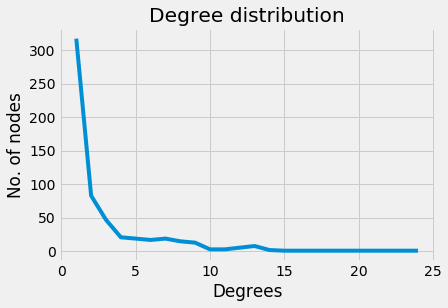

In [123]:
#DEGREE DISTRITION RAPPRESENTATA CON LINEPLOT E PER RELAZIONE:    
distribution_graph(Network_1k_trump_3nov) 

[('RubyRockstar333', 6), ('MichaelCoudrey', 10), ('kimfreethinker', 3), ('steve82644', 8), ('SaraCarterDC', 3), ('Ostrov_A', 1), ('Reuters', 1), ('Godwins1234', 6), ('pinkk9lover', 15), ('sfpelosi', 1), ('ClarkTurrent', 1), ('DanScavino', 5), ('librapaolita16', 7), ('BillyCorben', 1), ('kmbashkan', 23), ('KristenClarkeJD', 3), ('mikandynothem', 21), ('michaeljohns', 5), ('RockTheVote', 1), ('866OURVOTE', 2), ('Corey3Jbc', 6), ('AP', 3), ('RepsForBiden', 1), ('GovCTW', 2), ('4Tchat', 14), ('yeathatsari', 1), ('riromtz', 7), ('Everytown', 1), ('camayusa1', 3), ('rcohen719', 6), ('glaad', 1), ('steveziegenbus2', 2), ('gideonlasco', 1), ('SPL4USA', 7), ('Maximus_4EVR', 1), ('andytoronto', 15), ('AngelaMBurnsPHL', 1), ('yoruguaenusa', 3), ('shossy2', 3), ('LastNameFree', 1), ('MaryMargaretGil', 6), ('9NewsAUS', 1), ('MeidasTouch', 1), ('calliewine', 1), ('tom_trotts', 10), ('Tombx7M', 4), ('sam_vinograd', 1), ('mommamia1217', 2), ('graygraync', 3), ('HMR812', 6), ('SongBird4Trump', 2), ('re

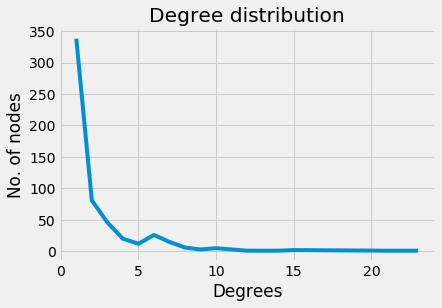

In [124]:
#DEGREE DISTRITION RAPPRESENTATA CON LINEPLOT E PER RELAZIONE:   
distribution_graph(Network_1k_biden_3nov) 

In [128]:
#Calcolo i degree per quanto riguarda i dataset del 3 novembre
degrees_1k_trump_3nov = [val for (node, val) in Network_1k_trump_3nov.degree()]
degrees_1k_biden_3nov = [val for (node, val) in Network_1k_biden_3nov.degree()]
degrees_trump_3nov = [val for (node, val) in G_network_trump_3nov.degree()]
degrees_biden_3nov = [val for (node, val) in G_network_biden_3nov.degree()]

In [125]:
#Average clustering:
print("L'average clustering per TRUMP 1K 3 NOV:", nx.average_clustering(Network_1k_trump_3nov))
print("L'average clustering per BIDEN 1K 3 NOV:", nx.average_clustering(Network_1k_biden_3nov))
print("L'average clustering per TRUMP 3 NOV:", nx.average_clustering(G_network_trump_3nov))
print("L'average clustering per BIDEN 3 NOV:", nx.average_clustering(G_network_biden_3nov))

L'average clustering per TRUMP 1K 3 NOV: 0.02484636069312262
L'average clustering per BIDEN 1K 3 NOV: 0.012185781059578455
L'average clustering per TRUMP 3 NOV: 0.0020597832761103016
L'average clustering per BIDEN 3 NOV: 0.0010099254808135544


In [126]:
#Osservazione cliques:
print("Nel grafo di Biden 1K del 3NOV vi sono", nx.graph_number_of_cliques(Network_1k_biden_3nov), "cliques") 
print("La più grande clique in Biden 1K del 3NOV è:", nx.graph_clique_number(Network_1k_biden_3nov))
print("Nel grafo di Trump 1K del 3NOV vi sono", nx.graph_number_of_cliques(Network_1k_trump_3nov), "cliques") 
print("La più grande clique in Trump 1K del 3NOV è:", nx.graph_clique_number(Network_1k_trump_3nov))
print("Nel grafo di Biden del 3NOV vi sono", nx.graph_number_of_cliques(G_network_biden_3nov), "cliques") 
print("La più grande clique in Biden del 3NOV è:", nx.graph_clique_number(G_network_biden_3nov))
print("Nel grafo di Trump del 3NOV vi sono", nx.graph_number_of_cliques(G_network_trump_3nov), "cliques") 
print("La più grande clique in Trump del 3NOV è:", nx.graph_clique_number(G_network_trump_3nov))

Nel grafo di Biden 1K del 3NOV vi sono 576 cliques
La più grande clique in Biden 1K del 3NOV è: 3
Nel grafo di Trump 1K del 3NOV vi sono 677 cliques
La più grande clique in Trump 1K del 3NOV è: 4
Nel grafo di Biden del 3NOV vi sono 44847 cliques
La più grande clique in Biden del 3NOV è: 3
Nel grafo di Trump del 3NOV vi sono 59527 cliques
La più grande clique in Trump del 3NOV è: 4


In [128]:
#dominating set nel 3 novembre 1k:
dominating_set_trump_1k_3nov = min_weighted_dominating_set(Network_1k_trump_3nov)
print("L'ordine del dominating set Trump 1k del 3nov è:", len(dominating_set_trump_1k_3nov))
dominating_set_biden_1k_3nov = min_weighted_dominating_set(Network_1k_biden_3nov)
print("L'ordine del dominating set Biden 1k del 3nov è:", len(dominating_set_biden_1k_3nov))

L'ordine del dominating set Trump 1k del 3nov è: 564
L'ordine del dominating set Biden 1k del 3nov è: 550


In [129]:
#Edge dominating set nel 3 novembre 1k:
edge_dominating_set_trump_1k_3nov = min_edge_dominating_set(Network_1k_trump_3nov)
print("L'ordine del dominating edge set Trump 1k del 3nov è:", len(edge_dominating_set_trump_1k_3nov))
edge_dominating_set_biden_1k_3nov = min_edge_dominating_set(Network_1k_biden_3nov)
print("L'ordine del dominating edeg set Biden 1k del 3nov è:", len(edge_dominating_set_biden_1k_3nov))

L'ordine del dominating edge set Trump 1k del 3nov è: 155
L'ordine del dominating edeg set Biden 1k del 3nov è: 157


In [131]:
#[COMMUNITY DETECTION:]
#Si è preso spunto nell'utilizzo di questo algoritmo di community detection da questo articolo: (https://python-louvain.readthedocs.io/en/latest/api.html)
partition_TRUMP_1K_3nov = community_louvain.best_partition(Network_1k_trump_3nov)
print("La modularity per Trump 1k del 3nov è: ", community.modularity(partition_TRUMP_1K_3nov, Network_1k_trump_3nov))
partition_BIDEN_1K_3nov = community_louvain.best_partition(Network_1k_biden_3nov)
print("La modularity per BIDEN 1k del 3nov è: ", community.modularity(partition_BIDEN_1K_3nov, Network_1k_biden_3nov))
partition_TRUMP_3nov = community_louvain.best_partition(G_network_trump_3nov)
print("La modularity per Trump del 3nov è: ", community.modularity(partition_TRUMP_3nov, G_network_trump_3nov))
partition_BIDEN_3nov = community_louvain.best_partition(G_network_biden_3nov)
print("La modularity per BIDEN del 3nov è: ", community.modularity(partition_BIDEN_3nov, G_network_biden_3nov))

La modularity per Trump 1k del 3nov è:  0.731255519730564
La modularity per BIDEN 1k del 3nov è:  0.8188316175292415
La modularity per Trump del 3nov è:  0.8935897791814125
La modularity per BIDEN del 3nov è:  0.9133067538943695


In [132]:
#Risultato degli algoritmi di partizionamento tramite Louvain:
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_TRUMP_1K_3nov.values()])))
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_BIDEN_1K_3nov.values()])))
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_TRUMP_3nov.values()])))
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_BIDEN_3nov.values()])))

Louvain's algorithm partitioned the graph into communities: 97
Louvain's algorithm partitioned the graph into communities: 114
Louvain's algorithm partitioned the graph into communities: 7718
Louvain's algorithm partitioned the graph into communities: 6641


In [133]:
#Estrazione delle informazioni del partizionamento Louvain trump 3 novembre 1k:
partition_TRUMP_1K_3nov_set = defaultdict(list)
for key, val in sorted(partition_TRUMP_1K_3nov.items()):
    partition_TRUMP_1K_3nov_set[val].append(key)
dim_p_trump_1k_3nov = []
for c in range(len(partition_TRUMP_1K_3nov_set)): 
    dim_p_trump_1k_3nov.append(len(partition_TRUMP_1K_3nov_set[c]))
L_trump_1k_3nov = pd.DataFrame(pd.Series(dim_p_trump_1k_3nov)) 
L_trump_1k_3nov.reset_index(inplace=True)
L_trump_1k_3nov.columns = ["Community","Order"] 
L_trump_1k_3nov.sort_values("Order",ascending=False,inplace=True)

In [134]:
#Estrazione delle informazioni del partizionamento Louvain biden 3 novembre 1k:
partition_BIDEN_1K_3nov_set = defaultdict(list)
for key, val in sorted(partition_BIDEN_1K_3nov.items()):
    partition_BIDEN_1K_3nov_set[val].append(key)
dim_p_biden_1k_3nov = []
for c in range(len(partition_BIDEN_1K_3nov_set)): 
    dim_p_biden_1k_3nov.append(len(partition_BIDEN_1K_3nov_set[c]))
L_biden_1k_3nov = pd.DataFrame(pd.Series(dim_p_biden_1k_3nov)) 
L_biden_1k_3nov.reset_index(inplace=True)
L_biden_1k_3nov.columns = ["Community","Order"] 
L_biden_1k_3nov.sort_values("Order",ascending=False,inplace=True)

In [137]:
#Estrazione delle informazioni del partizionamento Louvain trump 3 novembre intero:
partition_TRUMP_3nov_set = defaultdict(list)
for key, val in sorted(partition_TRUMP_3nov.items()):
    partition_TRUMP_3nov_set[val].append(key)
dim_p_trump_3nov = []
for c in range(len(partition_TRUMP_3nov_set)): 
    dim_p_trump_3nov.append(len(partition_TRUMP_3nov_set[c]))
L_trump_3nov = pd.DataFrame(pd.Series(dim_p_trump_3nov)) 
L_trump_3nov.reset_index(inplace=True)
L_trump_3nov.columns = ["Community","Order"] 
L_trump_3nov.sort_values("Order",ascending=False,inplace=True)

In [138]:
#Estrazione delle informazioni del partizionamento Louvain biden 3 novembre intero:
partition_BIDEN_3nov_set = defaultdict(list)
for key, val in sorted(partition_BIDEN_3nov.items()):
    partition_BIDEN_3nov_set[val].append(key)
dim_p_biden_3nov = []
for c in range(len(partition_BIDEN_3nov_set)): 
    dim_p_biden_3nov.append(len(partition_BIDEN_3nov_set[c]))
L_biden_3nov = pd.DataFrame(pd.Series(dim_p_biden_3nov)) 
L_biden_3nov.reset_index(inplace=True)
L_biden_3nov.columns = ["Community","Order"] 
L_biden_3nov.sort_values("Order",ascending=False,inplace=True)

In [139]:
#Calcolo coverage partition:
print("La coverage partition per Louvain di Trump 1k del 3nov è:", nx.algorithms.community.quality.coverage(Network_1k_trump_3nov,[e for e in partition_TRUMP_1K_3nov_set.values()]))
print("La coverage partition per Louvain di Biden 1k del 3nov è:", nx.algorithms.community.quality.coverage(Network_1k_biden_3nov,[e for e in partition_BIDEN_1K_3nov_set.values()]))
print("La coverage partition per Louvain di Trump del 3nov è:", nx.algorithms.community.quality.coverage(G_network_trump_3nov,[e for e in partition_TRUMP_3nov_set.values()]))
print("La coverage partition per Louvain di Biden del 3nov è:", nx.algorithms.community.quality.coverage(G_network_biden_3nov,[e for e in partition_BIDEN_3nov_set.values()]))

La coverage partition per Louvain di Trump 1k del 3nov è: 0.8348157560355781
La coverage partition per Louvain di Biden 1k del 3nov è: 0.8734177215189873
La coverage partition per Louvain di Trump del 3nov è: 0.9056773206505471
La coverage partition per Louvain di Biden del 3nov è: 0.9287753701777296


In [140]:
#Filtrare le community in base a quelle che superano la media:
av_order_biden_3nov = np.mean(L_biden_3nov.Order)
print("La average community order in questa partition è: ", av_order_biden_3nov) 
L_biden_3nov = L_biden_3nov[L_biden_3nov.Order>av_order_biden_3nov]
print("Il numero di community rilevanti è:" , len(L_biden_3nov))
L_biden_3nov = L_biden_3nov.reset_index(drop = True)
L_biden_3nov.head()


La average community order in questa partition è:  7.159614515886162
Il numero di community rilevanti è: 277


Community  Order
0         11   3152
1         17   1395
2         22   1213
3         16    987
4         61    894

In [141]:
#Filtrare le community in base a quelle che superano la media:
av_order_trump_3nov = np.mean(L_trump_3nov.Order)
print("La average community order in questa partition è: ", av_order_trump_3nov) 
L_trump_3nov = L_trump_3nov[L_trump_3nov.Order>av_order_trump_3nov]
print("Il numero di community rilevanti è:" , len(L_trump_3nov))
L_trump_3nov = L_trump_3nov.reset_index(drop = True)
L_trump_3nov.head()


La average community order in questa partition è:  7.8538481471883905
Il numero di community rilevanti è: 288


Community  Order
0         21   2291
1          1   1788
2          3   1620
3          8   1082
4         25   1054

In [142]:
#Filtrare le community in base a quelle che superano la media:
av_order_biden_1k_3nov = np.mean(L_biden_1k_3nov.Order)
print("La average community order in questa partition è: ", av_order_biden_1k_3nov) 
L_biden_1k_3nov = L_biden_1k_3nov[L_biden_1k_3nov.Order>av_order_biden_1k_3nov]
print("Il numero di community rilevanti è:" , len(L_biden_1k_3nov))
L_biden_1k_3nov = L_biden_1k_3nov.reset_index(drop = True)
L_biden_1k_3nov.head()

La average community order in questa partition è:  4.894736842105263
Il numero di community rilevanti è: 21


Community  Order
0          1     39
1          5     38
2          0     35
3          8     33
4         18     32

In [143]:
#Filtrare le community in base a quelle che superano la media:
av_order_trump_1k_3nov = np.mean(L_trump_1k_3nov.Order)
print("La average community order in questa partition è: ", av_order_trump_1k_3nov)
L_trump_1k_3nov = L_trump_1k_3nov[L_trump_1k_3nov.Order>av_order_trump_1k_3nov]
print("Il numero di community rilevanti è:" , len(L_trump_1k_3nov))
L_trump_1k_3nov = L_trump_1k_3nov.reset_index(drop = True)
L_trump_1k_3nov.head()

La average community order in questa partition è:  5.896907216494846
Il numero di community rilevanti è: 17


Community  Order
0          6     79
1          0     46
2          3     35
3          7     32
4         11     32

# analisi grafi dataset 7 novembre #

In [33]:
#Lunghezza dataset:
print("La lunghezza del dataset di partenza di biden: ",len(df_7nov_biden_sample))
print("La lunghezza del dataset di partenza di trump: ",len(df_7nov_trump_sample))


La lunghezza del dataset di partenza di biden:  277703
La lunghezza del dataset di partenza di trump:  114720


In [34]:
#Costruisco i dataset che saranno utilizzati per effettuare l'analisi dei grafi di trump e biden del 7 novembre. 
_7_nov_grafianalysis_trump_retweet = df_7nov_trump_sample
_7_nov_grafianalysis_biden_retweet = df_7nov_biden_sample

In [35]:
#[PARTIAMO DALL'ANALISI DEI RETWEET CON UN Pò DI INFORMAZIONI:]
_7_nov_grafianalysis_trump_retweet["retweet"] = _7_nov_grafianalysis_trump_retweet["Text"].apply(lambda x: re.findall(r"RT @(\w+)", x))
_7_nov_grafianalysis_trump_retweet["retweet_puliti"] = _7_nov_grafianalysis_trump_retweet.retweet.apply(', '.join)

_7_nov_grafianalysis_biden_retweet["retweet"] = _7_nov_grafianalysis_biden_retweet["Text"].apply(lambda x: re.findall(r"RT @(\w+)", x))
_7_nov_grafianalysis_biden_retweet["retweet_puliti"] = _7_nov_grafianalysis_biden_retweet.retweet.apply(', '.join)

#Andiamo a rimpiazzare con un NaN se non vi sono dei valori per quanto riguarda i retweets:
_7_nov_grafianalysis_biden_retweet.retweet_puliti.replace(r'^\s*$', np.nan, regex=True, inplace = True)
_7_nov_grafianalysis_trump_retweet.retweet_puliti.replace(r'^\s*$', np.nan, regex=True, inplace = True)

#Vengono rimossi tutti i tweets che non presentano dei RT:
_7_nov_grafianalysis_biden_retweet = _7_nov_grafianalysis_biden_retweet[_7_nov_grafianalysis_biden_retweet.retweet_puliti.notna()]
_7_nov_grafianalysis_trump_retweet = _7_nov_grafianalysis_trump_retweet[_7_nov_grafianalysis_trump_retweet.retweet_puliti.notna()]

In [36]:
#Resetto gli index da zero in ordine crescente:
_7_nov_grafianalysis_biden_retweet = _7_nov_grafianalysis_biden_retweet.reset_index(drop = True)
_7_nov_grafianalysis_trump_retweet = _7_nov_grafianalysis_trump_retweet.reset_index(drop = True)

In [39]:
#VADO A CREARE CON NETWROKX UN OGGETTO GRAFO [TRUMP]:
G_trump_networkx_7nov = nx.from_pandas_edgelist(_7_nov_grafianalysis_trump_retweet, 'Screen_name', 'retweet_puliti')

In [40]:
#VADO A CREARE CON NETWROKX UN OGGETTO GRAFO [TRUMP]:
G_biden_networkx_7nov = nx.from_pandas_edgelist(_7_nov_grafianalysis_biden_retweet, 'Screen_name', 'retweet_puliti')

In [41]:
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet [BIDEN]:
leaderboard_biden_retweet_7nov = {}
for x in G_biden_networkx_7nov.nodes:
 leaderboard_biden_retweet_7nov[x] = len(G_biden_networkx_7nov[x])
s_biden_retweet_7nov = pd.Series(leaderboard_biden_retweet_7nov, name='connections')
_7_nov_grafianalysis_biden_retweet_leaderboard = s_biden_retweet_7nov.to_frame().sort_values('connections', ascending=False)
_7_nov_grafianalysis_biden_retweet_leaderboard = _7_nov_grafianalysis_biden_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
_7_nov_grafianalysis_biden_retweet_leaderboard.head()

Screen_name  connessioni
0      LouDobbs         5327
1       Complex         4755
2   TomHourigan         2452
3  DineshDSouza         2445
4    w_terrence         2160

In [42]:
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet [TRUMP]:
leaderboard_trump_retweet_7nov = {}
for x in G_trump_networkx_7nov.nodes:
 leaderboard_trump_retweet_7nov[x] = len(G_trump_networkx_7nov[x])
s_trump_retweet_7nov = pd.Series(leaderboard_trump_retweet_7nov, name='connections')
_7_nov_grafianalysis_trump_retweet_leaderboard = s_trump_retweet_7nov.to_frame().sort_values('connections', ascending=False)
_7_nov_grafianalysis_trump_retweet_leaderboard = _7_nov_grafianalysis_trump_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
_7_nov_grafianalysis_trump_retweet_leaderboard.head()

Screen_name  connessioni
0    SidneyPowell1         2287
1       w_terrence         1962
2       Mediavenir         1483
3  TheRightMelissa          862
4     DineshDSouza          742

In [43]:
#Creazione dataset con prime tot persone con maggiori connessioni:
_7_nov_grafianalysis_trump_retweet_leaderboard_primi1k = _7_nov_grafianalysis_trump_retweet_leaderboard.head(1000)
_7_nov_grafianalysis_biden_retweet_leaderboard_primi1k = _7_nov_grafianalysis_biden_retweet_leaderboard.head(1000)

In [44]:
#Vado a creare i nodi per quanto riguarda i primi 1000 utenti che hanno effettuato maggiori connessioni:
screen_name_primi1k_trump_connessioni_7nov = _7_nov_grafianalysis_trump_retweet_leaderboard_primi1k["Screen_name"]
screen_name_primi1k_trump_connessioni_7nov = screen_name_primi1k_trump_connessioni_7nov.to_list()

screen_name_primi1k_biden_connessioni_7nov = _7_nov_grafianalysis_biden_retweet_leaderboard_primi1k["Screen_name"]
screen_name_primi1k_biden_connessioni_7nov = screen_name_primi1k_biden_connessioni_7nov.to_list()

In [45]:
#Codice per dire di estrapolare i nomi solamente di quelli contenuti all'interno della lista:
df_1knodiconpiùconnessioni_trump_7nov = _7_nov_grafianalysis_trump_retweet[_7_nov_grafianalysis_trump_retweet['Screen_name'].isin(screen_name_primi1k_trump_connessioni_7nov)]
df_1knodiconpiùconnessioni_biden_7nov = _7_nov_grafianalysis_biden_retweet[_7_nov_grafianalysis_biden_retweet['Screen_name'].isin(screen_name_primi1k_biden_connessioni_7nov)]

In [46]:
#Creazione nodi complessivi:
nodi_screen_trump_7_nov_intero =_7_nov_grafianalysis_trump_retweet['Screen_name'].tolist()
nodi_screen_biden_7_nov_intero =_7_nov_grafianalysis_biden_retweet['Screen_name'].tolist()

In [49]:
#Creazione nodi complessivi:
nodi_retweet_trump_7_nov_intero =_7_nov_grafianalysis_trump_retweet['retweet_puliti'].tolist()
nodi_retweet_biden_7_nov_intero =_7_nov_grafianalysis_biden_retweet['retweet_puliti'].tolist()

In [47]:
#Vado a trovare i nodi delle persone retweettate:
df_1knodiconpiùconnessioni_retweet_nodi_trump_7nov = df_1knodiconpiùconnessioni_trump_7nov['retweet_puliti'].tolist()
df_1knodiconpiùconnessioni_retweet_nodi_biden_7nov = df_1knodiconpiùconnessioni_biden_7nov['retweet_puliti'].tolist()

In [55]:
#Vado a creare una lista dei nodi:
df_1knodiconpiùconnessioni_screen_nodi_trump_7nov = df_1knodiconpiùconnessioni_trump_7nov['Screen_name'].tolist()
df_1knodiconpiùconnessioni_screen_nodi_biden_7nov = df_1knodiconpiùconnessioni_biden_7nov['Screen_name'].tolist()

In [50]:
#Vado a costruire i nodi complessivi:
nodi_trump_7_nov = nodi_screen_trump_7_nov_intero + nodi_retweet_trump_7_nov_intero
nodi_trump_7_nov_DEF = []
[nodi_trump_7_nov_DEF.append(item) for item in nodi_trump_7_nov if item not in nodi_trump_7_nov_DEF]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [51]:
#Vado a costruire i nodi complessivi:
nodi_biden_7_nov = nodi_screen_biden_7_nov_intero + nodi_retweet_biden_7_nov_intero
nodi_biden_7_nov_DEF = []
[nodi_biden_7_nov_DEF.append(item) for item in nodi_biden_7_nov if item not in nodi_biden_7_nov_DEF]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [56]:
#Costuiscono i nodi complessivi ma per il dataset di 1k connessioni maggiori:
df_1knodiconpiùconnessioni_trump_nodi_7nov = df_1knodiconpiùconnessioni_screen_nodi_trump_7nov + df_1knodiconpiùconnessioni_retweet_nodi_trump_7nov
df_1knodiconpiùconnessioni_trump_nodi_DEF_7nov = []
[df_1knodiconpiùconnessioni_trump_nodi_DEF_7nov.append(item) for item in df_1knodiconpiùconnessioni_trump_nodi_7nov if item not in df_1knodiconpiùconnessioni_trump_nodi_DEF_7nov]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [57]:
#Costuiscono i nodi complessivi ma per il dataset di 1k connessioni maggiori:
df_1knodiconpiùconnessioni_biden_nodi_7nov = df_1knodiconpiùconnessioni_screen_nodi_biden_7nov + df_1knodiconpiùconnessioni_retweet_nodi_biden_7nov
df_1knodiconpiùconnessioni_biden_nodi_DEF_7nov = []
[df_1knodiconpiùconnessioni_biden_nodi_DEF_7nov.append(item) for item in df_1knodiconpiùconnessioni_biden_nodi_7nov if item not in df_1knodiconpiùconnessioni_biden_nodi_DEF_7nov]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [58]:
df_1knodiconpiùconnessioni_trump_7nov['Edges'] = 1
df_1knodiconpiùconnessioni_trump_7nov['test'] = df_1knodiconpiùconnessioni_trump_7nov[['Screen_name', 'retweet_puliti']].values.tolist()
df_1knodiconpiùconnessioni_trump_7nov = df_1knodiconpiùconnessioni_trump_7nov.reset_index(drop = True)
df_1knodiconpiùconnessioni_trump_7nov.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date_time  Followers Hashtags Match_parola Match_parola_biden  \
0 2020-11-07 23:48:09        711      NaN          NaN                NaN   
1 2020-11-07 20:59:55        684      NaN          NaN                NaN   
2 2020-11-07 23:15:02        153      NaN          NaN                NaN   
3 2020-11-07 23:36:04        177      NaN          NaN                NaN   
4 2020-11-07 18:58:05         41      NaN          NaN                NaN   

  Match_parola_trump  Novembre Position      Screen_name  \
0                NaN         7   Tehran  Drestartiiiiiii   
1                NaN         7      NaN           hg1731   
2                NaN         7      NaN  TheEndI55967160   
3                NaN         7      NaN     MANI33424033   
4                NaN         7      Pa!         Bella_40   

                                                Text  \
0  RT @AASH24953890: با افتخار ما ری استارتیها کن...   
1  RT @DrMartyFox: #GeneralMikeFlynn \nOn #Electi...   
2  RT @MohsenFiroozi7: اینا ترند کنید \n\n#StopTh...   
3  RT @decicion2: @GenFlynn @RESTARTLEADER \n@rea...   
4  RT @SaqibIslam: People honking on their way to...   

                                        Text_clean_1  \
0  [RT, با, افتخار, ما, ری, استارتیها, کنار, پرزی...   
1  [RT, GeneralMikeFlynn, nOn, Election, 2020, nn...   
2  [RT, اینا, ترند, کنید, nnStopTheStealnElection...   
3  [RT, nnStopTheStealnElection, 2020, nTrump, 2020]   
4  [RT, People, honking, way, White, House, celeb...   

                                    _id   hashtags           retweet  \
0  ObjectId("5fa7323e83b78ae8b0768a35")  Trump2020    [AASH24953890]   
1  ObjectId("5fa70ad073183f3509cfe40c")      Trump      [DrMartyFox]   
2  ObjectId("5fa72a7b83b78ae8b0760a09")  Trump2020  [MohsenFiroozi7]   
3  ObjectId("5fa72f6983b78ae8b0765c3f")  Trump2020       [decicion2]   
4  ObjectId("5fa6ee4283b78ae8b070112c")  Trump2020      [SaqibIslam]   

   retweet_puliti  Edges                               test  
0    AASH24953890      1    [Drestartiiiiiii, AASH24953890]  
1      DrMartyFox      1               [hg1731, DrMartyFox]  
2  MohsenFiroozi7      1  [TheEndI55967160, MohsenFiroozi7]  
3       decicion2      1          [MANI33424033, decicion2]  
4      SaqibIslam      1             [Bella_40, SaqibIslam]

In [59]:
#Creo gli edges per il 7 novembre per trump e biden intero:
edges_retweet_trump_7_nov = list(_7_nov_grafianalysis_trump_retweet[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))
edges_retweet_biden_7_nov = list(_7_nov_grafianalysis_biden_retweet[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))

In [60]:
#Creo gli edges per il 7 novembre per trump e biden 1k:
edges_df_1knodiconpiùconnessioni_trump_7nov = list(df_1knodiconpiùconnessioni_trump_7nov[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))
edges_df_1knodiconpiùconnessioni_biden_7nov = list(df_1knodiconpiùconnessioni_biden_7nov[["Screen_name", 'retweet_puliti']].itertuples(index=False, name=None))

In [61]:
#Prima rappresentazione retweet:
g_7nov_trump_retweet = Graph(directed=True)
g_7nov_trump_retweet.add_vertices(nodi_trump_7_nov_DEF)
g_7nov_trump_retweet.add_edges(edges_retweet_trump_7_nov)
#Per eventuale rappresetnazione:
#style = {}
#style["edge_curved"] = False
#style["vertex_size"] = 4
#plot(g_3nov_trump_retweet, **style)

In [62]:
#Prima rappresentazione retweet:
g_7nov_biden_retweet = Graph(directed=True)
g_7nov_biden_retweet.add_vertices(nodi_biden_7_nov_DEF)
g_7nov_biden_retweet.add_edges(edges_retweet_biden_7_nov)
#Per eventuale rappresentazione:
#style = {}
#style["edge_curved"] = False
#style["vertex_size"] = 4
#plot(g_3nov_biden_retweet, **style)

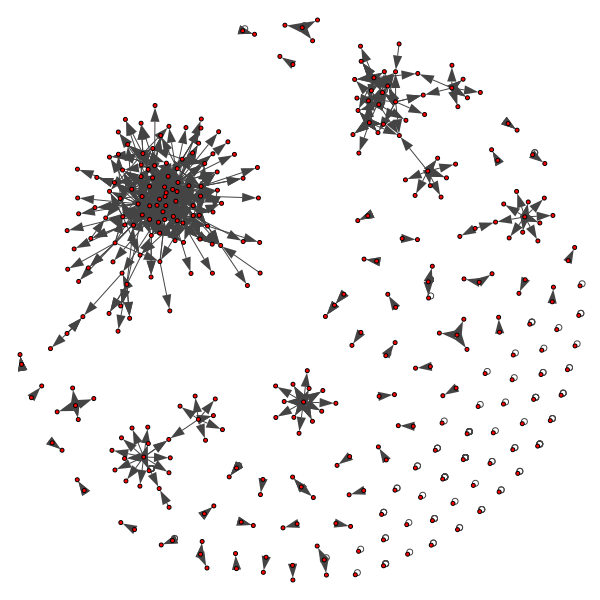

In [63]:
#Prima rappresentazione retweet [TRUMP]:
g_1k_trump_7nov = Graph(directed=True)
g_1k_trump_7nov.add_vertices(df_1knodiconpiùconnessioni_trump_nodi_DEF_7nov)
g_1k_trump_7nov.add_edges(edges_df_1knodiconpiùconnessioni_trump_7nov)
#eventuale rappresentazione:
style = {}
style["edge_curved"] = False
style["vertex_size"] = 4
plot(g_1k_trump_7nov, **style)


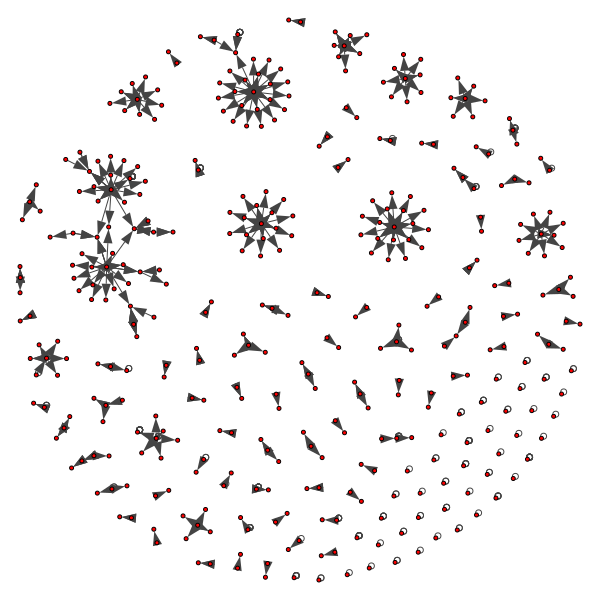

In [64]:
#Prima rappresentazione retweet [BIDEN]:
g_1k_biden_7nov = Graph(directed=True)
g_1k_biden_7nov.add_vertices(df_1knodiconpiùconnessioni_biden_nodi_DEF_7nov)
g_1k_biden_7nov.add_edges(edges_df_1knodiconpiùconnessioni_biden_7nov)
#Eventuale rappresentazione:
style = {}
style["edge_curved"] = False
style["vertex_size"] = 4
plot(g_1k_biden_7nov, **style)

In [65]:
#Costruzione informazioni network con Network:
#[trump]
G_network_trump_7nov = nx.Graph()
G_network_trump_7nov.add_nodes_from(nodi_trump_7_nov_DEF)
G_network_trump_7nov.add_edges_from(edges_retweet_trump_7_nov)
#[biden]
G_network_biden_7nov = nx.Graph()
G_network_biden_7nov.add_nodes_from(nodi_biden_7_nov_DEF)
G_network_biden_7nov.add_edges_from(edges_retweet_biden_7_nov)

In [66]:
#Costruzione network con nx 1 K:
#[TRUMP]
G_network_1k_trump_7nov = nx.Graph()
G_network_1k_trump_7nov.add_nodes_from(df_1knodiconpiùconnessioni_trump_nodi_DEF_7nov)
G_network_1k_trump_7nov.add_edges_from(edges_df_1knodiconpiùconnessioni_trump_7nov)

#[BIDEN]
G_network_1k_biden_7nov = nx.Graph()
G_network_1k_biden_7nov.add_nodes_from(df_1knodiconpiùconnessioni_biden_nodi_DEF_7nov)
G_network_1k_biden_7nov.add_edges_from(edges_df_1knodiconpiùconnessioni_biden_7nov)

In [67]:
#Vado a creare un nuovo dataframe con le informazioni che mi sono utili per poi estrapolare il mio grafo:
df_1knodiconpiùconnessioni_trump_utili_7nov = df_1knodiconpiùconnessioni_trump_7nov[["Screen_name", "retweet_puliti"]]
df_1knodiconpiùconnessioni_biden_utili_7nov = df_1knodiconpiùconnessioni_biden_7nov[["Screen_name", "retweet_puliti"]]

In [68]:
#Vado creare il network da nx:
Network_1k_trump_7nov = nx.from_pandas_edgelist(df_1knodiconpiùconnessioni_trump_utili_7nov, source='Screen_name', target='retweet_puliti', edge_attr=True,)
Network_1k_biden_7nov = nx.from_pandas_edgelist(df_1knodiconpiùconnessioni_biden_utili_7nov, source='Screen_name', target='retweet_puliti', edge_attr=True,)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


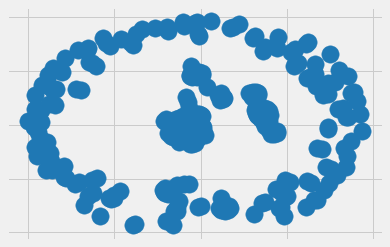

In [69]:
#Rappresentazione ad area del 7 novembre trump 1k:
nx.draw_networkx(Network_1k_trump_7nov, with_labels=False)

In [ ]:
#Rappresentazione ad area del 7 novembre trump 1k:
nx.draw_networkx(Network_1k_biden_7nov, with_labels=False)

In [70]:
#Trasformazione manuale in diretto:
G_network_1k_trump_7nov_directed = G_network_1k_trump_7nov.to_directed()
G_network_1k_biden_7nov_directed = G_network_1k_biden_7nov.to_directed()

In [71]:
#Costruiscono il grafo diretto:
Network_1k_trump_7nov_direct = nx.DiGraph() 
Network_1k_trump_7nov_direct.add_edges_from(edges_df_1knodiconpiùconnessioni_trump_7nov)
#Eventuale rappresentazione:
#plt.figure(figsize =(10, 10)) 
#nx.draw_networkx(Network_1k_trump_3nov_direct, node_color ='green') 

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [72]:
#Costruiscono il grafo diretto:
Network_1k_biden_7nov_direct = nx.DiGraph() 
Network_1k_biden_7nov_direct.add_edges_from(edges_df_1knodiconpiùconnessioni_biden_7nov)
#Eventuale rappresentazione:
#plt.figure(figsize =(10, 10)) 
#nx.draw_networkx(Network_2k_trump_3nov_direct, node_color ='green') 

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [73]:
#VADO AD OTTENERE LE INFORMAZIONI SUL NETWORK 7 NOVEMBRE INTERO:
print("Informazioni grafo riguardo TRUMP:")
print(nx.info(G_network_trump_7nov))
print("\\\\\\\\")
print("Informazioni grafo riguardo BIDEN:")
print(nx.info(G_network_biden_7nov))


Informazioni grafo riguardo TRUMP:
Name: 
Type: Graph
Number of nodes: 59727
Number of edges: 54463
Average degree:   1.8237
\\\\
Informazioni grafo riguardo BIDEN:
Name: 
Type: Graph
Number of nodes: 130667
Number of edges: 128212
Average degree:   1.9624


In [74]:
#VADO AD OTTENERE LE INFORMAZIONI SUL NETWORK 7 NOVEMBRE 1K:
print(nx.info(G_network_1k_trump_7nov))
print("\\\\\\\\")
print(nx.info(G_network_1k_biden_7nov))


Name: 
Type: Graph
Number of nodes: 351
Number of edges: 534
Average degree:   3.0427
\\\\
Name: 
Type: Graph
Number of nodes: 382
Number of edges: 328
Average degree:   1.7173


In [75]:
#INFORMAZIONE OTTENIBILE EVENTUALMENTE ANCHE SENZA EFFETTUARE QUESTO CODICE, VERIFICHIAMO SE I NETWORK SONO CONNESSI:
print("Il network di Trump del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_trump_7nov))
print("\\\\\\")
print("Il network di Biden del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_biden_7nov))
print("\\\\\\")
print("Il network di Trump 1K del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_1k_trump_7nov))
print("\\\\\\")
print("Il network di Biden 1K del 3 Novembre, sono connessi?")
print(nx.is_connected(G_network_1k_biden_7nov))

Il network di Trump del 3 Novembre, sono connessi?
False
\\\
Il network di Biden del 3 Novembre, sono connessi?
False
\\\
Il network di Trump 1K del 3 Novembre, sono connessi?
False
\\\
Il network di Biden 1K del 3 Novembre, sono connessi?
False


In [76]:
#Calcolo della density dei vari network:
density_trump_7nov = nx.density(G_network_trump_7nov)
print("Network density di Trump del 7 Novembre:", density_trump_7nov)
print("\\\\\\")
density_biden_7nov = nx.density(G_network_biden_7nov)
print("Network density di Biden del 7 Novembre:", density_biden_7nov)
print("\\\\\\")
density_trump_7nov_1k = nx.density(G_network_1k_trump_7nov)
print("Network density di Trump 1K del 7 Novembre:", density_trump_7nov_1k)
print("\\\\\\")
density_biden_7nov_1k = nx.density(G_network_1k_biden_7nov)
print("Network density di Biden 1K del 7 Novembre:", density_biden_7nov_1k)


Network density di Trump del 7 Novembre: 3.053496485278542e-05
\\\
Network density di Biden del 7 Novembre: 1.5018624318843518e-05
\\\
Network density di Trump 1K del 7 Novembre: 0.008693528693528694
\\\
Network density di Biden 1K del 7 Novembre: 0.004507289991892375


In [79]:
#Triadic Closure dei vari network::
triadic_closure_trump_7nov = nx.transitivity(G_network_trump_7nov)
print("Triadic closure TRUMP:", triadic_closure_trump_7nov)
print("\\\\\\\\\\\\\\")
triadic_closure_biden_7nov = nx.transitivity(G_network_biden_7nov)
print("Triadic closure BIDEN:", triadic_closure_biden_7nov)
print("\\\\\\\\\\\\\\")
triadic_closure_trump_7nov_1k = nx.transitivity(G_network_1k_trump_7nov)
print("Triadic closure TRUMP:", triadic_closure_trump_7nov_1k)
print("\\\\\\\\\\\\\\")
triadic_closure_biden_7nov_1k = nx.transitivity(G_network_1k_biden_7nov)
print("Triadic closure BIDEN:", triadic_closure_biden_7nov_1k)

Triadic closure TRUMP: 9.625232666475144e-05
\\\\\\\
Triadic closure BIDEN: 1.7011323527364946e-05
\\\\\\\
Triadic closure TRUMP: 0.14035546262415055
\\\\\\\
Triadic closure BIDEN: 0


[Text(0, 0.5, 'Screen_name'),
 (0, 0.06),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY TRUMP 7 NOVEMBRE INTERO')]

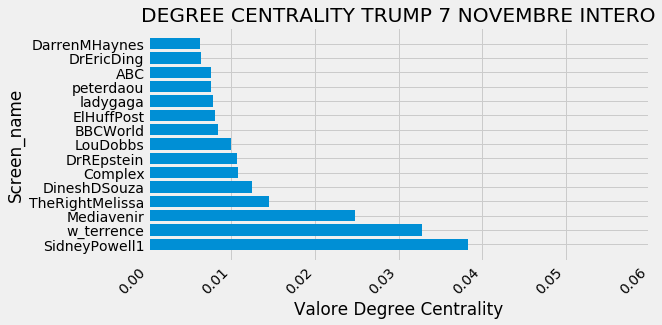

In [260]:
#Degree centrality TRUMP 7 novembre intero:
degree_centrality_trump_7nov = degree_centrality(G_network_trump_7nov)

degree_centrality_trump_7nov = pd.DataFrame.from_dict(degree_centrality_trump_7nov, orient='index')
degree_centrality_trump_7nov = degree_centrality_trump_7nov.reset_index()
degree_centrality_trump_7nov = degree_centrality_trump_7nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_trump_7nov = degree_centrality_trump_7nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_trump_7nov_top15 = degree_centrality_trump_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_trump_7nov_top15['Screen_name'], degree_centrality_trump_7nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.06], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY TRUMP 7 NOVEMBRE INTERO')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.06),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY BIDEN 7 NOVEMBRE INTERO')]

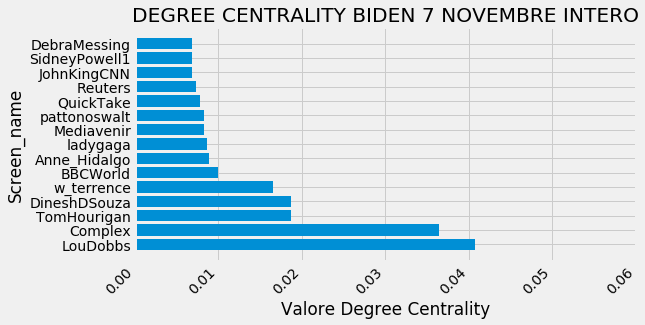

In [261]:
#Degree centrality BIDEN 7 novembre intero:
degree_centrality_biden_7nov = degree_centrality(G_network_biden_7nov)

degree_centrality_biden_7nov = pd.DataFrame.from_dict(degree_centrality_biden_7nov, orient='index')
degree_centrality_biden_7nov = degree_centrality_biden_7nov.reset_index()
degree_centrality_biden_7nov = degree_centrality_biden_7nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_biden_7nov = degree_centrality_biden_7nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_biden_7nov_top15 = degree_centrality_biden_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_biden_7nov_top15['Screen_name'], degree_centrality_biden_7nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.06], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY BIDEN 7 NOVEMBRE INTERO')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.1),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY TRUMP 1K 7 NOVEMBRE')]

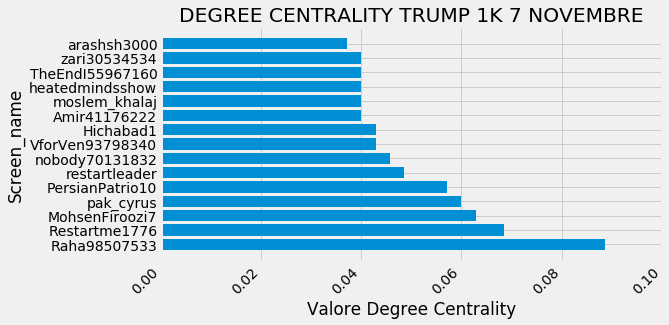

In [263]:
#DEGREE CENTRALITY 1K 7 NOV TRUMP
degree_centrality_1k_trump_7nov = degree_centrality(G_network_1k_trump_7nov)
degree_centrality_1k_trump_7nov = pd.DataFrame.from_dict(degree_centrality_1k_trump_7nov, orient='index')
degree_centrality_1k_trump_7nov = degree_centrality_1k_trump_7nov.reset_index()
degree_centrality_1k_trump_7nov = degree_centrality_1k_trump_7nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_1k_trump_7nov = degree_centrality_1k_trump_7nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_1k_trump_7nov_top15 = degree_centrality_1k_trump_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_1k_trump_7nov_top15['Screen_name'], degree_centrality_1k_trump_7nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.10], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY TRUMP 1K 7 NOVEMBRE')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.1),
 Text(0.5, 0, 'Valore Degree Centrality'),
 Text(0.5, 1.0, 'DEGREE CENTRALITY BIDEN 1K 7 NOVEMBRE')]

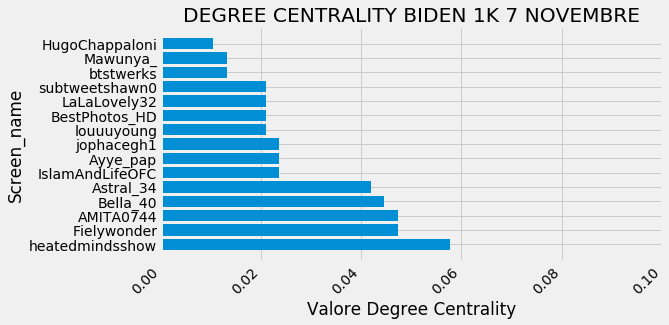

In [264]:
#DEGREE CENTRALITY 1K 3 NOV BIDEN
degree_centrality_1k_biden_7nov = degree_centrality(G_network_1k_biden_7nov)
degree_centrality_1k_biden_7nov = pd.DataFrame.from_dict(degree_centrality_1k_biden_7nov, orient='index')
degree_centrality_1k_biden_7nov = degree_centrality_1k_biden_7nov.reset_index()
degree_centrality_1k_biden_7nov = degree_centrality_1k_biden_7nov.rename(columns={"index": "Screen_name", 0 : "degree_centrality"})
degree_centrality_1k_biden_7nov = degree_centrality_1k_biden_7nov.sort_values(by=['degree_centrality'], ascending=False).reset_index(drop=True)

degree_centrality_1k_biden_7nov_top15 = degree_centrality_1k_biden_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(degree_centrality_1k_biden_7nov_top15['Screen_name'], degree_centrality_1k_biden_7nov_top15['degree_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.10], xlabel='Valore Degree Centrality', ylabel='Screen_name',
       title='DEGREE CENTRALITY BIDEN 1K 7 NOVEMBRE')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Closeness Centrality'),
 Text(0.5, 1.0, 'CLOSENESS CENTRALITY 1K TRUMP 7 NOVEMBRE')]

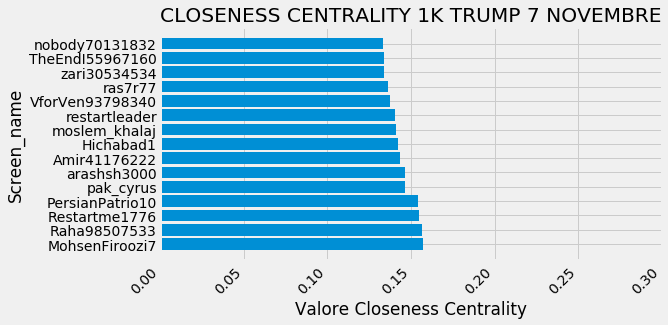

In [270]:
#CLOSENESS CENTRALITY TRUMP 1K 7NOV:
closeness_centrality_1k_trump_7nov = closeness_centrality(G_network_1k_trump_7nov, u=None, wf_improved=True)

closeness_centrality_1k_trump_7nov = pd.DataFrame.from_dict(closeness_centrality_1k_trump_7nov, orient='index')
closeness_centrality_1k_trump_7nov = closeness_centrality_1k_trump_7nov.reset_index()
closeness_centrality_1k_trump_7nov = closeness_centrality_1k_trump_7nov.rename(columns={"index": "Screen_name", 0 : "closeness_centrality"})
closeness_centrality_1k_trump_7nov = closeness_centrality_1k_trump_7nov.sort_values(by=['closeness_centrality'], ascending=False).reset_index(drop=True)

closeness_centrality_1k_trump_7nov_top15 = closeness_centrality_1k_trump_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(closeness_centrality_1k_trump_7nov_top15['Screen_name'], closeness_centrality_1k_trump_7nov_top15['closeness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Closeness Centrality', ylabel='Screen_name',
       title='CLOSENESS CENTRALITY 1K TRUMP 7 NOVEMBRE')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Closeness Centrality'),
 Text(0.5, 1.0, 'CLOSENESS CENTRALITY 1K BIDEN 7 NOVEMBRE')]

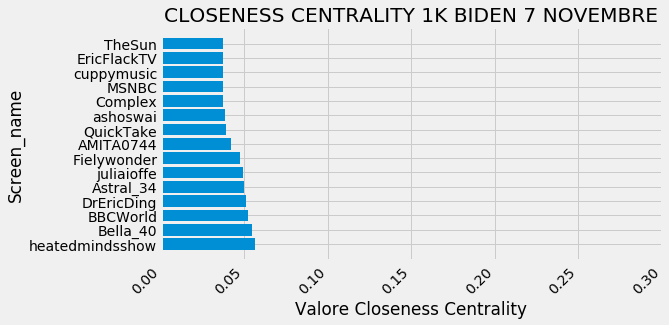

In [271]:
#CLOSENESS CENTRALITY BIDEN 1K 7NOV:
closeness_centrality_1k_biden_7nov = closeness_centrality(G_network_1k_biden_7nov, u=None, wf_improved=True)

closeness_centrality_1k_biden_7nov = pd.DataFrame.from_dict(closeness_centrality_1k_biden_7nov, orient='index')
closeness_centrality_1k_biden_7nov = closeness_centrality_1k_biden_7nov.reset_index()
closeness_centrality_1k_biden_7nov = closeness_centrality_1k_biden_7nov.rename(columns={"index": "Screen_name", 0 : "closeness_centrality"})
closeness_centrality_1k_biden_7nov = closeness_centrality_1k_biden_7nov.sort_values(by=['closeness_centrality'], ascending=False).reset_index(drop=True)

closeness_centrality_1k_biden_7nov_top15 = closeness_centrality_1k_biden_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(closeness_centrality_1k_biden_7nov_top15['Screen_name'], closeness_centrality_1k_biden_7nov_top15['closeness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Closeness Centrality', ylabel='Screen_name',
       title='CLOSENESS CENTRALITY 1K BIDEN 7 NOVEMBRE')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Betweenness Centrality'),
 Text(0.5, 1.0, 'BETWEENNESS CENTRALITY TRUMP 7 NOVEMBRE')]

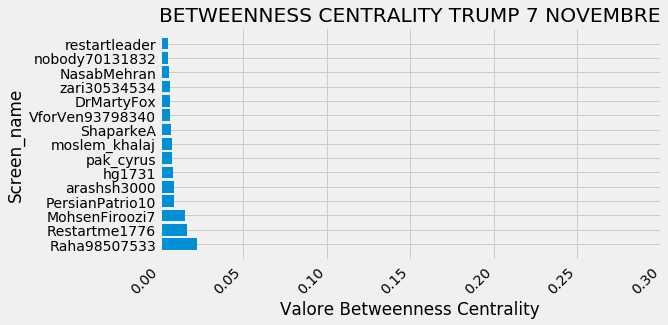

In [87]:
#BETWEENESS CENTRALITY TRUMP 1k 7nov:
betweenness_centrality_1k_trump_7nov = betweenness_centrality(G_network_1k_trump_7nov)
betweenness_centrality_1k_trump_7nov = pd.DataFrame.from_dict(betweenness_centrality_1k_trump_7nov, orient='index')
betweenness_centrality_1k_trump_7nov = betweenness_centrality_1k_trump_7nov.reset_index()
betweenness_centrality_1k_trump_7nov = betweenness_centrality_1k_trump_7nov.rename(columns={"index": "Screen_name", 0 : "betweenness_centrality"})
betweenness_centrality_1k_trump_7nov = betweenness_centrality_1k_trump_7nov.sort_values(by=['betweenness_centrality'], ascending=False).reset_index(drop=True)

betweenness_centrality_1k_trump_7nov_top15 = betweenness_centrality_1k_trump_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(betweenness_centrality_1k_trump_7nov_top15['Screen_name'], betweenness_centrality_1k_trump_7nov_top15['betweenness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Betweenness Centrality', ylabel='Screen_name',
       title='BETWEENNESS CENTRALITY TRUMP 7 NOVEMBRE 1K')

[Text(0, 0.5, 'Screen_name'),
 (0, 0.3),
 Text(0.5, 0, 'Valore Betweenness Centrality'),
 Text(0.5, 1.0, 'BETWEENNESS CENTRALITY TRUMP 7 NOVEMBRE')]

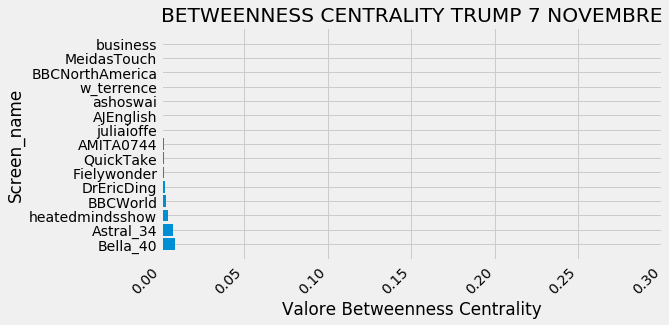

In [88]:
#BETWEENESS CENTRALITY BIDEN 1k 7nov:
betweenness_centrality_1k_biden_7nov = betweenness_centrality(G_network_1k_biden_7nov)

betweenness_centrality_1k_biden_7nov = pd.DataFrame.from_dict(betweenness_centrality_1k_biden_7nov, orient='index')
betweenness_centrality_1k_biden_7nov = betweenness_centrality_1k_biden_7nov.reset_index()
betweenness_centrality_1k_biden_7nov = betweenness_centrality_1k_biden_7nov.rename(columns={"index": "Screen_name", 0 : "betweenness_centrality"})
betweenness_centrality_1k_biden_7nov = betweenness_centrality_1k_biden_7nov.sort_values(by=['betweenness_centrality'], ascending=False).reset_index(drop=True)

betweenness_centrality_1k_biden_7nov_top15 = betweenness_centrality_1k_biden_7nov.head(15)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(betweenness_centrality_1k_biden_7nov_top15['Screen_name'], betweenness_centrality_1k_biden_7nov_top15['betweenness_centrality'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 0.30], xlabel='Valore Betweenness Centrality', ylabel='Screen_name',
       title='BETWEENNESS CENTRALITY TRUMP 7 NOVEMBRE 1K')

In [259]:
#Colcolo della misura di Pagerank [TRUMP] 7 NOV INTERO:
pr_trump_7nov = nx.pagerank(G_network_trump_7nov, alpha = 0.8) 

pr_trump_7nov = pd.DataFrame.from_dict(pr_trump_7nov, orient='index')
pr_trump_7nov = pr_trump_7nov.reset_index()
pr_trump_7nov = pr_trump_7nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_trump_7nov = pr_trump_7nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_trump_7nov.head(10)

Screen_name  pagerank
0    SidneyPowell1  0.015182
1       w_terrence  0.013146
2       Mediavenir  0.010325
3  TheRightMelissa  0.005603
4     DineshDSouza  0.004886
5          Complex  0.004580
6       DrREpstein  0.004249
7         LouDobbs  0.003864
8       ElHuffPost  0.003371
9         BBCWorld  0.003361

In [92]:
#Colcolo della misura di Pagerank [BIDEN] 7 NOVEMBRE INTERO:
pr_biden_7nov = nx.pagerank(G_network_biden_7nov, alpha = 0.8) 

pr_biden_7nov = pd.DataFrame.from_dict(pr_biden_7nov, orient='index')
pr_biden_7nov = pr_biden_7nov.reset_index()
pr_biden_7nov = pr_biden_7nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_biden_7nov = pr_biden_7nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_biden_7nov.head(10)

Screen_name  pagerank
0      LouDobbs  0.017296
1       Complex  0.017183
2   TomHourigan  0.008823
3  DineshDSouza  0.007710
4    w_terrence  0.006981
5      BBCWorld  0.004157
6      ladygaga  0.004058
7  Anne_Hidalgo  0.003895
8    Mediavenir  0.003815
9  pattonoswalt  0.003808

In [93]:
#Colcolo della misura di Pagerank [TRUMP] 1K 7NOV:
pr_1k_trump_7nov = nx.pagerank(G_network_1k_trump_7nov, alpha = 0.8) 
pr_1k_trump_7nov = pd.DataFrame.from_dict(pr_1k_trump_7nov, orient='index')
pr_1k_trump_7nov = pr_1k_trump_7nov.reset_index()
pr_1k_trump_7nov = pr_1k_trump_7nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_1k_trump_7nov = pr_1k_trump_7nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_1k_trump_7nov.head(10)

Screen_name  pagerank
0  heatedmindsshow  0.017974
1      Fielywonder  0.016760
2     Raha98507533  0.014913
3         Bella_40  0.013820
4    Restartme1776  0.011106
5  BilodeauJacque2  0.010074
6       sajmeister  0.009714
7   MohsenFiroozi7  0.008932
8        pak_cyrus  0.008506
9     cdauverchain  0.008385

In [94]:
#Colcolo della misura di Pagerank [BIDEN] 1K 7NOV:
pr_1k_biden_7nov = nx.pagerank(G_network_1k_biden_7nov, alpha = 0.8) 

pr_1k_biden_7nov = pd.DataFrame.from_dict(pr_1k_biden_7nov, orient='index')
pr_1k_biden_7nov = pr_1k_biden_7nov.reset_index()
pr_1k_biden_7nov = pr_1k_biden_7nov.rename(columns={"index": "Screen_name", 0 : "pagerank"})
pr_1k_biden_7nov = pr_1k_biden_7nov.sort_values(by=['pagerank'], ascending=False).reset_index(drop=True)

pr_1k_biden_7nov.head(10)

Screen_name  pagerank
0  heatedmindsshow  0.026422
1      Fielywonder  0.022409
2        AMITA0744  0.020610
3         Bella_40  0.018827
4        Astral_34  0.017541
5         Ayye_pap  0.011931
6       jophacegh1  0.011931
7   subtweetshawn0  0.010767
8  IslamAndLifeOFC  0.010163
9     LaLaLovely32  0.009007

In [96]:
#average_degree_connectivity TRUMP 1K 7NOV
average_degree_connectivity_1k_trump_7nov = nx.average_degree_connectivity(Network_1k_trump_7nov)
average_degree_connectivity_1k_trump_7nov = pd.DataFrame.from_dict(average_degree_connectivity_1k_trump_7nov, orient='index')
average_degree_connectivity_1k_trump_7nov = average_degree_connectivity_1k_trump_7nov.reset_index()
average_degree_connectivity_1k_trump_7nov = average_degree_connectivity_1k_trump_7nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_1k_trump_7nov = average_degree_connectivity_1k_trump_7nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_1k_trump_7nov.head()

Screen_name  avg_degree_connectivity
0           13                14.538462
1           20                12.800000
2           15                12.200000
3           22                12.090909
4            6                11.888889

In [98]:
#average_degree_connectivity TRUMP 7NOV INTERO
average_degree_connectivity_trump_7nov = nx.average_degree_connectivity(G_network_trump_7nov)
average_degree_connectivity_trump_7nov = pd.DataFrame.from_dict(average_degree_connectivity_trump_7nov, orient='index')
average_degree_connectivity_trump_7nov = average_degree_connectivity_trump_7nov.reset_index()
average_degree_connectivity_trump_7nov = average_degree_connectivity_trump_7nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_trump_7nov = average_degree_connectivity_trump_7nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_trump_7nov.head()

Screen_name  avg_degree_connectivity
0            1               297.753740
1            2               197.068388
2            3                94.150997
3            4                38.429000
4            5                16.588722

In [99]:
#average_degree_connectivity BIDEN 1K 7NOV
average_degree_connectivity_1k_biden_7nov = nx.average_degree_connectivity(Network_1k_biden_7nov)
average_degree_connectivity_1k_biden_7nov = pd.DataFrame.from_dict(average_degree_connectivity_1k_biden_7nov, orient='index')
average_degree_connectivity_1k_biden_7nov = average_degree_connectivity_1k_biden_7nov.reset_index()
average_degree_connectivity_1k_biden_7nov = average_degree_connectivity_1k_biden_7nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_1k_biden_7nov = average_degree_connectivity_1k_biden_7nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_1k_biden_7nov.head()

Screen_name  avg_degree_connectivity
0            1                 7.832727
1            3                 3.053333
2            4                 2.900000
3            8                 1.687500
4           16                 1.625000

In [100]:
#average_degree_connectivity BIDEN 7NOV
average_degree_connectivity_biden_7nov = nx.average_degree_connectivity(G_network_biden_7nov)
average_degree_connectivity_biden_7nov = pd.DataFrame.from_dict(average_degree_connectivity_biden_7nov, orient='index')
average_degree_connectivity_biden_7nov = average_degree_connectivity_biden_7nov.reset_index()
average_degree_connectivity_biden_7nov = average_degree_connectivity_biden_7nov.rename(columns={"index": "Screen_name", 0 : "avg_degree_connectivity"})
average_degree_connectivity_biden_7nov = average_degree_connectivity_biden_7nov.sort_values(by=["avg_degree_connectivity"], ascending=False).reset_index(drop=True)

average_degree_connectivity_biden_7nov.head()

Screen_name  avg_degree_connectivity
0            1               700.417842
1            2               470.870646
2            3               317.278362
3            4               164.611842
4            5                89.809351

In [103]:
#Numero di componenti connesse:
print("Numero componenti connessi TRUMP 1K 7NOV:")
print(nx.number_connected_components(Network_1k_trump_7nov)) 
print("|||||||")
print("Numero componenti connessi BIDEN 1K 7NOV:")
print(nx.number_connected_components(Network_1k_biden_7nov)) 
print("|||||||")
print("Numero componenti connessi TRUMP 7NOV:")
print(nx.number_connected_components(G_network_trump_7nov)) 
print("|||||||")
print("Numero componenti connessi BIDEN 7NOV:")
print(nx.number_connected_components(G_network_biden_7nov)) 

Numero componenti connessi TRUMP 1K 7NOV:
95
|||||||
Numero componenti connessi BIDEN 1K 7NOV:
126
|||||||
Numero componenti connessi TRUMP 7NOV:
7818
|||||||
Numero componenti connessi BIDEN 7NOV:
12372


In [108]:
#Calcolo dei self-loops:
print("Numero totale di self-loops TRUMP 1K 7NOV: ", int(Network_1k_trump_7nov.number_of_selfloops())) 
print("Numero totale di self-loops BIDEN 1K 7NOV: ", int(Network_1k_biden_7nov.number_of_selfloops())) 
print("Numero totale di self-loops TRUMP 7 NOV: ", int(G_network_trump_7nov.number_of_selfloops())) 
print("Numero totale di self-loops BIDEN 7 NOV: ", int(G_network_biden_7nov.number_of_selfloops())) 

Total number of self-loops TRUMP 1K 7NOV:  58
Total number of self-loops BIDEN 1K 7NOV:  70
Total number of self-loops TRUMP 7 NOV:  552
Total number of self-loops BIDEN 7 NOV:  1109


[('Drestartiiiiiii', 11), ('AASH24953890', 9), ('hg1731', 8), ('DrMartyFox', 3), ('TheEndI55967160', 14), ('MohsenFiroozi7', 22), ('MANI33424033', 8), ('decicion2', 2), ('Bella_40', 10), ('SaqibIslam', 1), ('pershia7777', 4), ('JaiRaison', 10), ('edouardhusson', 3), ('Pouria81150352', 7), ('namakiyee', 2), ('Fielywonder', 12), ('supercooltimes', 1), ('NDecristofaro', 1), ('MarioBubu', 1), ('alone4567a', 9), ('pak_cyrus', 21), ('sahar__1992', 4), ('cdauverchain', 7), ('MartialBild', 1), ('TornadoNewsLink', 4), ('ShaparkeA', 12), ('Makeirangreata1', 3), ('PersianPatrio10', 20), ('moslem_khalaj', 14), ('NasabMehran', 7), ('Mohamma66631211', 9), ('Restart50422525', 2), ('peterdaou', 1), ('KellyRay77', 1), ('wildesttearss', 2), ('Raha98507533', 31), ('eCRqbM1VlOWuDml', 1), ('e_simorgh', 2), ('ras7r77', 10), ('farfromself', 6), ('arashsh3000', 13), ('anthonyrcsc05', 3), ('Restartme1776', 24), ('VforVen93798340', 15), ('Restartt7777', 9), ('doctor_oxford', 1), ('NickBryantNY', 1), ('Hichabad1

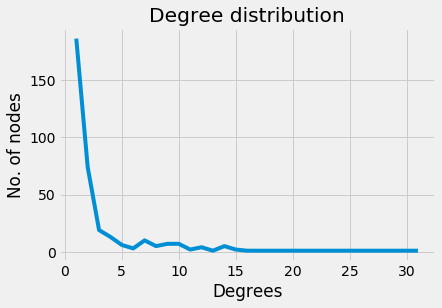

In [110]:
#Calcolo degree distribution con anche rappresentazioen tramite line plot: 
distribution_graph(Network_1k_trump_7nov) 


[('EnsembleEMacron', 2), ('TheSizzleReport', 3), ('meggi_07', 3), ('IslamAndLifeOFC', 9), ('ChLECHEVALIER', 3), ('Fielywonder', 18), ('JNLIII', 1), ('OyaAmaira02', 1), ('LaLaLovely32', 8), ('theskratchsaga', 1), ('WritersFrock', 4), ('Shysterhater', 1), ('DeanMeminger', 2), ('_ntrpr', 1), ('tabernamontanu7', 1), ('Bella_40', 17), ('TheSun', 1), ('_PCTE_', 1), ('GarciaAstor', 1), ('subtweetshawn0', 8), ('I_AmChynna_Chae', 1), ('louuuyoung', 8), ('xxgodoverme25', 1), ('jophacegh1', 9), ('MariessaDevlin', 1), ('JustJaggers', 3), ('heatedmindsshow', 22), ('PettyLupone', 1), ('ChalecosAmarill', 4), ('FreedomWorks', 2), ('brother_ullah', 1), ('Ayye_pap', 9), ('BennyHaunna_', 1), ('AMITA0744', 18), ('ggukksavage', 1), ('cd_land', 3), ('OnZeLeft', 1), ('btstwerks', 5), ('AdritaMosharra1', 1), ('evelynmicely', 1), ('MsKathyBates', 1), ('BestPhotos_HD', 8), ('MileyNewsAccess', 3), ('RocNation19', 1), ('SalmanNizami_', 1), ('ashoswai', 3), ('Iam_shuayb', 1), ('Inside_US4', 1), ('sai_krish513', 1)

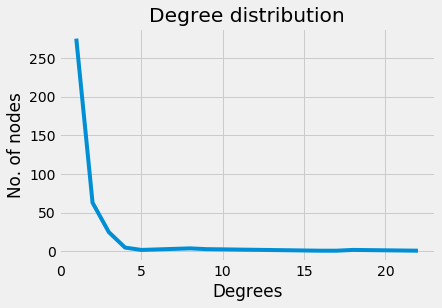

In [111]:
#Calcolo degree distribution con anche rappresentazioen tramite line plot: 
distribution_graph(Network_1k_biden_7nov) 

In [112]:
#Calcolo i degree per quanto riguarda i dataset del 3 novembre
degrees_1k_trump_7nov = [val for (node, val) in Network_1k_trump_7nov.degree()]
degrees_1k_biden_7nov = [val for (node, val) in Network_1k_biden_7nov.degree()]
degrees_trump_7nov = [val for (node, val) in G_network_trump_7nov.degree()]
degrees_biden_7nov = [val for (node, val) in G_network_biden_7nov.degree()]

In [114]:
#Average clustering:
print("L'average clustering per TRUMP 1K 7 NOV:", nx.average_clustering(Network_1k_trump_7nov))
print("L'average clustering per BIDEN 1K 7 NOV:", nx.average_clustering(Network_1k_biden_7nov))
print("L'average clustering per TRUMP 7 NOV:", nx.average_clustering(G_network_trump_7nov))
print("L'average clustering per BIDEN 7 NOV:", nx.average_clustering(G_network_biden_7nov))

L'average clustering per TRUMP 1K 7 NOV: 0.043138095129939005
L'average clustering per BIDEN 1K 7 NOV: 0.0
L'average clustering per TRUMP 7 NOV: 0.0010299666236485625
L'average clustering per BIDEN 7 NOV: 0.0013542478187320206


In [115]:
#Estraggo le informazioni sulle cliques:
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(Network_1k_biden_7nov), "cliques") 
print("La più grande clique in Biden 1K del 7NOV è:", nx.graph_clique_number(Network_1k_biden_7nov))
print("Nel grafo di Trump 1K del 7NOV vi sono", nx.graph_number_of_cliques(Network_1k_trump_7nov), "cliques") 
print("La più grande clique in Trump 1K del 7NOV è:", nx.graph_clique_number(Network_1k_trump_7nov))
print("Nel grafo di Biden del 7NOV vi sono", nx.graph_number_of_cliques(G_network_biden_7nov), "cliques") 
print("La più grande clique in Biden del 7NOV è:", nx.graph_clique_number(G_network_biden_7nov))
print("Nel grafo di Trump del 7NOV vi sono", nx.graph_number_of_cliques(G_network_trump_7nov), "cliques") 
print("La più grande clique in Trump del 7NOV è:", nx.graph_clique_number(G_network_trump_7nov))

Nel grafo di Biden 1K del 3NOV vi sono 301 cliques
La più grande clique in Biden 1K del 3NOV è: 2
Nel grafo di Trump 1K del 3NOV vi sono 428 cliques
La più grande clique in Trump 1K del 3NOV è: 4
Nel grafo di Biden del 3NOV vi sono 127351 cliques
La più grande clique in Biden del 3NOV è: 4
Nel grafo di Trump del 3NOV vi sono 54056 cliques
La più grande clique in Trump del 3NOV è: 4


In [116]:
#Dominating set
dominating_set_trump_1k_7nov = min_weighted_dominating_set(Network_1k_trump_7nov)
print("L'ordine del dominating set Trump 1k del 7nov è:", len(dominating_set_trump_1k_7nov))
dominating_set_biden_1k_7nov = min_weighted_dominating_set(Network_1k_biden_7nov)
print("L'ordine del dominating set Biden 1k del 7nov è:", len(dominating_set_biden_1k_7nov))

L'ordine del dominating set Trump 1k del 7nov è: 351
L'ordine del dominating set Biden 1k del 7nov è: 381


In [117]:
#Edge dominating set
edge_dominating_set_trump_1k_7nov = min_edge_dominating_set(Network_1k_trump_7nov)
print("L'ordine del dominating edge set Trump 1k del 7nov è:", len(edge_dominating_set_trump_1k_7nov))
edge_dominating_set_biden_1k_7nov = min_edge_dominating_set(Network_1k_biden_7nov)
print("L'ordine del dominating edeg set Biden 1k del 7nov è:", len(edge_dominating_set_biden_1k_7nov))

L'ordine del dominating edge set Trump 1k del 3nov è: 88
L'ordine del dominating edeg set Biden 1k del 3nov è: 92


In [120]:
#[COMMUNITY DETECTION:]
partition_TRUMP_1K_7nov = community_louvain.best_partition(Network_1k_trump_7nov)
print("La modularity per Trump 1k del 3nov è: ", community.modularity(partition_TRUMP_1K_7nov, Network_1k_trump_7nov))
partition_BIDEN_1K_7nov = community_louvain.best_partition(Network_1k_biden_7nov)
print("La modularity per BIDEN 1k del 3nov è: ", community.modularity(partition_BIDEN_1K_7nov, Network_1k_biden_7nov))
partition_TRUMP_7nov = community_louvain.best_partition(G_network_trump_7nov)
print("La modularity per Trump del 3nov è: ", community.modularity(partition_TRUMP_7nov, G_network_trump_7nov))
partition_BIDEN_7nov = community_louvain.best_partition(G_network_biden_7nov)
print("La modularity per BIDEN del 3nov è: ", community.modularity(partition_BIDEN_7nov, G_network_biden_7nov))

La modularity per Trump 1k del 3nov è:  0.6681360378178953
La modularity per BIDEN 1k del 3nov è:  0.9618670062462803
La modularity per Trump del 3nov è:  0.9673417486679767
La modularity per BIDEN del 3nov è:  0.9403727711703072


In [121]:
#Partizionamento generato dall'algoritmo di Louvain:
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_TRUMP_1K_7nov.values()])))
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_BIDEN_1K_7nov.values()])))
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_TRUMP_7nov.values()])))
print("Louvain's algorithm partitioned the graph into communities:", len(set([c for c in partition_BIDEN_7nov.values()])))

Louvain's algorithm partitioned the graph into communities: 99
Louvain's algorithm partitioned the graph into communities: 127
Louvain's algorithm partitioned the graph into communities: 7918
Louvain's algorithm partitioned the graph into communities: 12524


In [144]:
#Estrazione delle informazioni del partizionamento Louvain trump 7 novembre 1k:
partition_TRUMP_1K_7nov_set = defaultdict(list)
for key, val in sorted(partition_TRUMP_1K_7nov.items()):
    partition_TRUMP_1K_7nov_set[val].append(key)
dim_p_trump_1k_7nov = []
for c in range(len(partition_TRUMP_1K_7nov_set)): 
    dim_p_trump_1k_7nov.append(len(partition_TRUMP_1K_7nov_set[c]))
L_trump_1k_7nov = pd.DataFrame(pd.Series(dim_p_trump_1k_7nov)) 
L_trump_1k_7nov = L_trump_1k_7nov.reset_index(inplace=True)
L_trump_1k_7nov = L_trump_1k_7nov.columns = ["Community","Order"] 
L_trump_1k_7nov = L_trump_1k_7nov.sort_values("Order",ascending=False,inplace=True)
L_trump_1k_7nov

NameError: name 'partition_TRUMP_1K_7nov' is not defined

In [145]:
#Estrazione delle informazioni del partizionamento Louvain biden 7 novembre 1k:
partition_BIDEN_1K_7nov_set = defaultdict(list)
for key, val in sorted(partition_BIDEN_1K_7nov.items()):
    partition_BIDEN_1K_7nov_set[val].append(key)
dim_p_biden_1k_7nov = []
for c in range(len(partition_BIDEN_1K_7nov_set)): 
    dim_p_biden_1k_7nov.append(len(partition_BIDEN_1K_7nov_set[c]))
L_biden_1k_7nov = pd.DataFrame(pd.Series(dim_p_biden_1k_7nov)) 
L_biden_1k_7nov = L_biden_1k_7nov.reset_index(inplace=True)
L_biden_1k_7nov = L_biden_1k_7nov.columns = ["Community","Order"] 
L_biden_1k_7nov = L_biden_1k_7nov.sort_values("Order",ascending=False,inplace=True)
L_biden_1k_7nov

NameError: name 'partition_BIDEN_1K_7nov' is not defined

In [126]:
#Estrazione delle informazioni del partizionamento Louvain trump 7 novembre intero:
partition_TRUMP_7nov_set = defaultdict(list)
for key, val in sorted(partition_TRUMP_7nov.items()):
    partition_TRUMP_7nov_set[val].append(key)
dim_p_trump_7nov = []
for c in range(len(partition_TRUMP_7nov_set)): 
    dim_p_trump_7nov.append(len(partition_TRUMP_7nov_set[c]))
L_trump_7nov = pd.DataFrame(pd.Series(dim_p_trump_7nov)) 
L_trump_7nov = L_trump_7nov.reset_index(inplace=True)
L_trump_7nov = L_trump_7nov.columns = ["Community","Order"] 
L_trump_7nov = L_trump_7nov.sort_values("Order",ascending=False,inplace=True)
L_trump_7nov

Community  Order
54           54   2135
23           23   1873
41           41   1477
20           20   1147
25           25    952
...         ...    ...
1209       1209      1
5356       5356      1
5357       5357      1
7414       7414      1
4905       4905      1

[7918 rows x 2 columns]

In [127]:
#Estrazione delle informazioni del partizionamento Louvain biden 7 novembre intero:
partition_BIDEN_7nov_set = defaultdict(list)
for key, val in sorted(partition_BIDEN_7nov.items()):
    partition_BIDEN_7nov_set[val].append(key)
dim_p_biden_7nov = []
for c in range(len(partition_BIDEN_7nov_set)): 
    dim_p_biden_7nov.append(len(partition_BIDEN_7nov_set[c]))
L_biden_7nov = pd.DataFrame(pd.Series(dim_p_biden_7nov)) 
L_biden_7nov = L_biden_7nov.reset_index(inplace=True)
L_biden_7nov = L_biden_7nov.columns = ["Community","Order"] 
L_biden_7nov = L_biden_7nov.sort_values("Order",ascending=False,inplace=True)
L_biden_7nov

Community  Order
16            16   6060
9              9   4801
33            33   4681
41            41   3540
26            26   2940
...          ...    ...
4353        4353      1
8919        8919      1
2376        2376      1
11299      11299      1
5483        5483      1

[12524 rows x 2 columns]

In [129]:
#Calcolo coverage partition:
print("La coverage partition per Louvain di Trump 1k del 7nov è:", nx.algorithms.community.quality.coverage(Network_1k_trump_7nov,[e for e in partition_TRUMP_1K_7nov_set.values()]))
print("La coverage partition per Louvain di Biden 1k del 7nov è:", nx.algorithms.community.quality.coverage(Network_1k_biden_7nov,[e for e in partition_BIDEN_1K_7nov_set.values()]))
print("La coverage partition per Louvain di Trump del 7nov è:", nx.algorithms.community.quality.coverage(G_network_trump_7nov,[e for e in partition_TRUMP_7nov_set.values()]))
print("La coverage partition per Louvain di Biden del 7nov è:", nx.algorithms.community.quality.coverage(G_network_biden_7nov,[e for e in partition_BIDEN_7nov_set.values()]))

La coverage partition per Louvain di Trump 1k del 7nov è: 0.8614232209737828
La coverage partition per Louvain di Biden 1k del 7nov è: 0.9908536585365854
La coverage partition per Louvain di Trump del 7nov è: 0.976883388722619
La coverage partition per Louvain di Biden del 7nov è: 0.9537484790815213


In [130]:
#Filtrare le community in base a quelle che superano la media:
av_order_biden_7nov = np.mean(L_biden_7nov.Order)
print("La average community order in questa partition è: ", av_order_biden_7nov) #Select only relevant communities
L_biden_7nov = L_biden_7nov[L_biden_7nov.Order>av_order_biden_7nov]
print("Il numero di community rilevanti è:" , len(L_biden_7nov))
L_biden_7nov = L_biden_7nov.reset_index(drop = True)
L_biden_7nov.head()

La average community order in questa partition è:  10.433328010220377
Il numero di community rilevanti è: 361


Community  Order
0         16   6060
1          9   4801
2         33   4681
3         41   3540
4         26   2940

In [131]:
#Filtrare le community in base a quelle che superano la media:
av_order_trump_7nov = np.mean(L_trump_7nov.Order)
print("La average community order in questa partition è: ", av_order_trump_7nov) #Select only relevant communities
L_trump_7nov = L_trump_7nov[L_trump_7nov.Order>av_order_trump_7nov]
print("Il numero di community rilevanti è:" , len(L_trump_7nov))
L_trump_7nov = L_trump_7nov.reset_index(drop = True)
L_trump_7nov.head()

La average community order in questa partition è:  7.543192725435716
Il numero di community rilevanti è: 451


Community  Order
0         54   2135
1         23   1873
2         41   1477
3         20   1147
4         25    952

In [221]:
#Filtrare le community in base a quelle che superano la media:
av_order_biden_1k_7nov = np.mean(L_biden_1k_7nov.Order)
print("La average community order in questa partition è: ", av_order_biden_1k_7nov) #Select only relevant communities
L_biden_1k_7nov = L_biden_1k_7nov[L_biden_1k_7nov.Order>av_order_biden_1k_7nov]
print("Il numero di community rilevanti è:" , len(L_biden_1k_7nov))
L_biden_1k_7nov = L_biden_1k_7nov.reset_index(drop = True)
L_biden_1k_7nov

AttributeError: 'Styler' object has no attribute 'Order'

In [133]:
#Filtrare le community in base a quelle che superano la media:
av_order_trump_1k_7nov = np.mean(L_trump_1k_7nov.Order)
print("La average community order in questa partition è: ", av_order_trump_1k_7nov) #Select only relevant communities
L_trump_1k_7nov = L_trump_1k_7nov[L_trump_1k_7nov.Order>av_order_trump_1k_7nov]
print("Il numero di community rilevanti è:" , len(L_trump_1k_7nov))
L_trump_1k_7nov = L_trump_1k_7nov.reset_index(drop = True)
L_trump_1k_7nov.head()


La average community order in questa partition è:  3.5454545454545454
Il numero di community rilevanti è: 12


Community  Order
0          0     64
1          5     31
2          1     25
3         11     23
4          3     16

# CONFRONTI GRAFI #

In [146]:
import style

In [147]:
#Le informazioni riportate sono state ottenute tramite le operazioni precedenti:
#Costruisco dataframe per confronti:
dataframe_confronti_grafi = {"Dataset" : ["Trump_3_Intero", "Biden_3_Intero", "Trump_3_1k", "Biden_3_1k", "Trump_7_Intero", "Biden_7_Intero", "Trump_7_1k", "Biden_7_1k"],
                       "len_tweets": [114516, 89208, "NaN", "NaN", 277703, 114720, "NaN", "NaN"] , 
                             "num_nodes":[59423, 47586, 509, 539, 59727, 130667, 351, 382], "num_edges":[58410, 45093, 664,600, 54463, 128212, 534, 328],
"avg_degree": [1.9659, 1.895, 2.60, 2.226, 1.8237, 1.9624, 3.04, 1.7173],
                             "nx_density":[3.30837, 3.9828, 0.00513, 0.00413, 3.0534, 1.5018, 0.00869, 0.004507], 
                             "transitivity": [8.91854, 2.99028, 0.04260, 0.025078, 9.62523, 1.70113, 0.140355, 0.0],
                             "componenti_conn":[7723, 6564, 91, 90, 7818, 12372, 95, 126],
                             "self_loops": [685, 532, 84, 58, 552, 1109, 58, 70],
                             "avg_clustering":[0.00222, 0.001186, 0.0218, 0.009360, 0.001029, 0.001354, 0.043138, 0.0],
                             "cliques":[57801, 44746, 571, 552, 54056, 127351, 428, 301],
                             "dominating_set":["NaN", "NaN", 501, 536, "NaN", "NaN", 351, 381],
                             "edge_dominating_set":["NaN", "NaN", 138, 153, "NaN", "NaN", 88, 92],
                             "modularity":[0.8989, 0.91467, 0.7755, 0.83753, 0.96734, 0.94037, 0.66813, 0.96186],
                             "louvin_partition":[7808, 6643, 102, 102, 7918, 12524, 99, 127],
                             "coverage_partition":[0.91307, 0.92967, 0.8448, 0.91333, 0.9768, 0.9537, 0.86142, 0.99085],
                             "avg_community_order":[7.1349, 7.1349, 4.99019, 5.284313, 7.54319, 10.4332, 3.5454, 3.00787],
                             "community_rilevanti":[279, 279, 19 ,19, 451, 361, 12, 20]
                            }


In [148]:
#Vado a costruire il dataframe con le varie informazioni statistiche:
dataframe_confronti_grafi = pd.DataFrame(dataframe_confronti_grafi, columns = ["Dataset", "len_tweets", "num_nodes", "num_edges", "avg_degree", "nx_density", "transitivity", "componenti_conn", "self_loops", "avg_clustering", "cliques", "dominating_set", "edge_dominating_set", "modularity", "louvin_partition", "coverage_partition", "avg_community_order", "community_rilevanti"])

In [149]:
dataframe_confronti_grafi

Dataset len_tweets  num_nodes  num_edges  avg_degree  nx_density  \
0  Trump_3_Intero     114516      59423      58410      1.9659    3.308370   
1  Biden_3_Intero      89208      47586      45093      1.8950    3.982800   
2      Trump_3_1k        NaN        509        664      2.6000    0.005130   
3      Biden_3_1k        NaN        539        600      2.2260    0.004130   
4  Trump_7_Intero     277703      59727      54463      1.8237    3.053400   
5  Biden_7_Intero     114720     130667     128212      1.9624    1.501800   
6      Trump_7_1k        NaN        351        534      3.0400    0.008690   
7      Biden_7_1k        NaN        382        328      1.7173    0.004507   

   transitivity  componenti_conn  self_loops  avg_clustering  cliques  \
0      8.918540             7723         685        0.002220    57801   
1      2.990280             6564         532        0.001186    44746   
2      0.042600               91          84        0.021800      571   
3      0.025078               90          58        0.009360      552   
4      9.625230             7818         552        0.001029    54056   
5      1.701130            12372        1109        0.001354   127351   
6      0.140355               95          58        0.043138      428   
7      0.000000              126          70        0.000000      301   

  dominating_set edge_dominating_set  modularity  louvin_partition  \
0            NaN                 NaN     0.89890              7808   
1            NaN                 NaN     0.91467              6643   
2            501                 138     0.77550               102   
3            536                 153     0.83753               102   
4            NaN                 NaN     0.96734              7918   
5            NaN                 NaN     0.94037             12524   
6            351                  88     0.66813                99   
7            381                  92     0.96186               127   

   coverage_partition  avg_community_order  community_rilevanti  
0             0.91307             7.134900                  279  
1             0.92967             7.134900                  279  
2             0.84480             4.990190                   19  
3             0.91333             5.284313                   19  
4             0.97680             7.543190                  451  
5             0.95370            10.433200                  361  
6             0.86142             3.545400                   12  
7             0.99085             3.007870                   20

In [150]:
#Costruisco un dataframe con le informazioni riguardo ai dataset dei network con nodi ed edges INTERO:
dataframe_confronti_grafi_intero = dataframe_confronti_grafi.loc[dataframe_confronti_grafi['Dataset'].isin(['Trump_3_Intero','Biden_3_Intero', "Trump_7_Intero", "Biden_7_Intero"])]
dataframe_confronti_grafi_intero = dataframe_confronti_grafi_intero.reset_index(drop = True)
dataframe_confronti_grafi_intero

Dataset len_tweets  num_nodes  num_edges  avg_degree  nx_density  \
0  Trump_3_Intero     114516      59423      58410      1.9659     3.30837   
1  Biden_3_Intero      89208      47586      45093      1.8950     3.98280   
2  Trump_7_Intero     277703      59727      54463      1.8237     3.05340   
3  Biden_7_Intero     114720     130667     128212      1.9624     1.50180   

   transitivity  componenti_conn  self_loops  avg_clustering  cliques  \
0       8.91854             7723         685        0.002220    57801   
1       2.99028             6564         532        0.001186    44746   
2       9.62523             7818         552        0.001029    54056   
3       1.70113            12372        1109        0.001354   127351   

  dominating_set edge_dominating_set  modularity  louvin_partition  \
0            NaN                 NaN     0.89890              7808   
1            NaN                 NaN     0.91467              6643   
2            NaN                 NaN     0.96734              7918   
3            NaN                 NaN     0.94037             12524   

   coverage_partition  avg_community_order  community_rilevanti  
0             0.91307              7.13490                  279  
1             0.92967              7.13490                  279  
2             0.97680              7.54319                  451  
3             0.95370             10.43320                  361

In [151]:
#Costruisco un dataframe con le informazioni riguardo ai dataset dei network con nodi ed edges 1K:
dataframe_confronti_grafi_1k = dataframe_confronti_grafi.loc[dataframe_confronti_grafi['Dataset'].isin(["Trump_3_1k",'Biden_3_1k', "Trump_7_1k", "Biden_7_1k"])]
dataframe_confronti_grafi_1k = dataframe_confronti_grafi_1k.reset_index(drop = True)
dataframe_confronti_grafi_1k

Dataset len_tweets  num_nodes  num_edges  avg_degree  nx_density  \
0  Trump_3_1k        NaN        509        664      2.6000    0.005130   
1  Biden_3_1k        NaN        539        600      2.2260    0.004130   
2  Trump_7_1k        NaN        351        534      3.0400    0.008690   
3  Biden_7_1k        NaN        382        328      1.7173    0.004507   

   transitivity  componenti_conn  self_loops  avg_clustering  cliques  \
0      0.042600               91          84        0.021800      571   
1      0.025078               90          58        0.009360      552   
2      0.140355               95          58        0.043138      428   
3      0.000000              126          70        0.000000      301   

  dominating_set edge_dominating_set  modularity  louvin_partition  \
0            501                 138     0.77550               102   
1            536                 153     0.83753               102   
2            351                  88     0.66813                99   
3            381                  92     0.96186               127   

   coverage_partition  avg_community_order  community_rilevanti  
0             0.84480             4.990190                   19  
1             0.91333             5.284313                   19  
2             0.86142             3.545400                   12  
3             0.99085             3.007870                   20

In [152]:
#Vado a settare il nome del "dataset" come index:
dataframe_confronti_grafi_intero = dataframe_confronti_grafi_intero.set_index("Dataset")

In [153]:
#Vado a settare il nome del "dataset" come index:
dataframe_confronti_grafi_1k = dataframe_confronti_grafi_1k.set_index("Dataset")

In [154]:
#Vado a settare il nome del "dataset" come index:
dataframe_confronti_grafi = dataframe_confronti_grafi.set_index("Dataset")

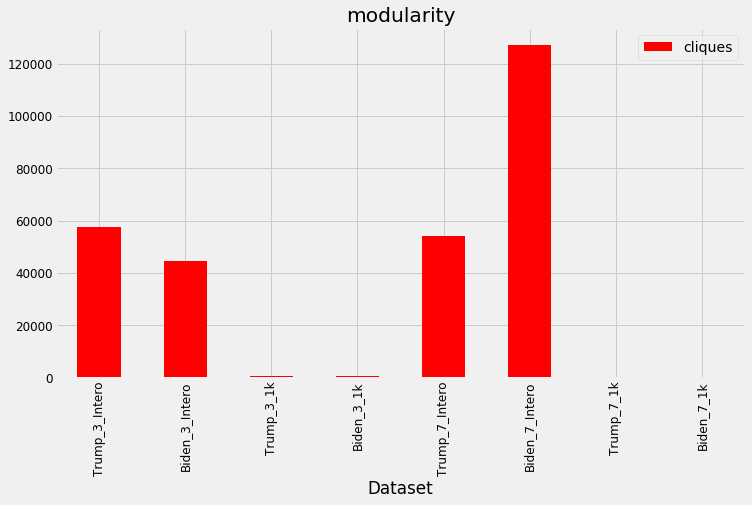

In [158]:
#Modello 1 per fare i confronti tra grafi. I grafici sono stati sviluppati a partire da questo modello di barplot cambiando le variabili di interesse per l'analisi.
confronti_intero_2colonne = dataframe_confronti_grafi[["cliques"]].plot(kind='bar', title ="modularity", color = "blue",figsize=(11, 6), legend=True, fontsize=12)

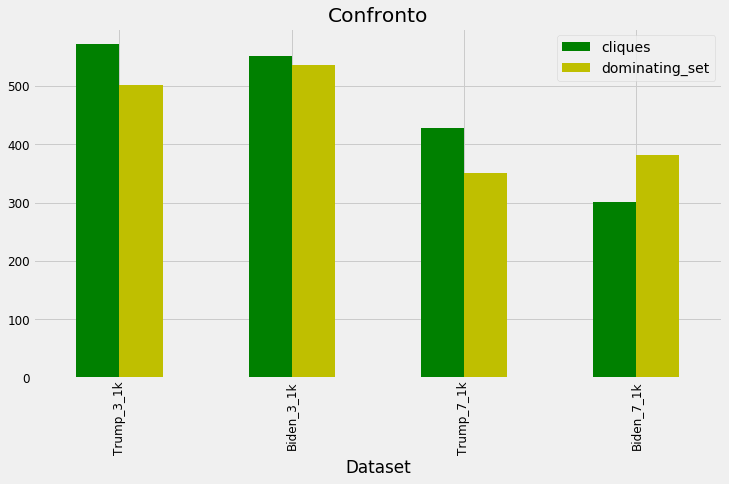

In [160]:
#Modello 2 per fare i confronti tra grafi. I grafici sono stati sviluppati a partire da questo modello di barplot cambiando le variabili di interesse per l'analisi.
confronti_intero_2colonne = dataframe_confronti_grafi_1k[['cliques','dominating_set']].plot(kind='bar', title ="Confronto", color = ("g", "y"), figsize=(11, 6), legend=True, fontsize=12)

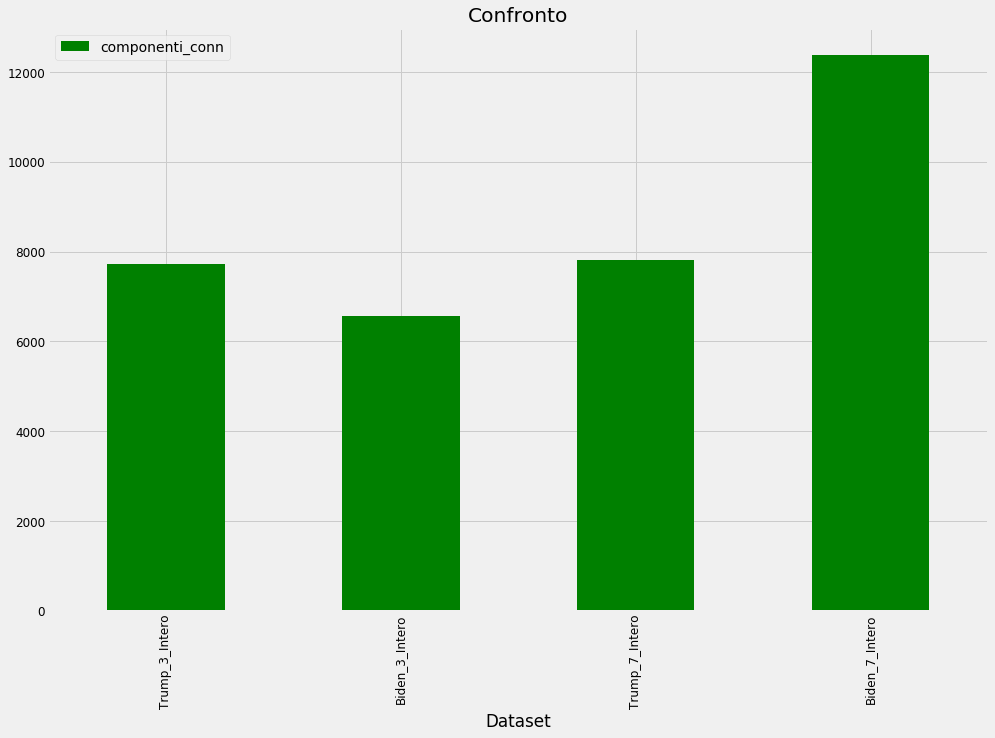

In [215]:
#Modello 3 per fare i confronti tra grafi. I grafici sono stati sviluppati a partire da questo modello di barplot cambiando le variabili di interesse per l'analisi.
confronti_intero_unacolonna = dataframe_confronti_grafi_intero[['componenti_conn']].plot(kind='bar', title ="Confronto", color = "g", figsize=(15, 10), legend=True, fontsize=12)

In [224]:
#Si va ad evidenziare il valore minore o maggiore di riferimento per le varie colonne:
dataframe_confronti_grafi_intero.head(10).style.highlight_max(color = 'yellow').highlight_min(color = "red")

In [256]:
#Si va ad effettuare un'analisi delle correlazioni con il metodo di Pearson:
dataframe_confronti_grafi.corr(method ='pearson').style.background_gradient(cmap = 'Blues')